# CLV Prediction for Car Insurance Company
by Qemhal Haritskhayru 

---

Dataset used in this machine learning model -> [Dataset Source](https://drive.google.com/drive/folders/1GR7l3uWmcOCA2sxx1W-cEkReDxdedoeJ)

### Contents
1. Business Background
2. Data Cleaning and Understanding
3. Data Analysis
4. Modeling for Prediction
5. Saving the model
6. Explainable AI
7. Conclusion and Recommendation

> ### 1. Business Background

**1.1 Background**

Acquiring a new customer can often be significantly more expensive than retaining an existing one. This is due to the various costs associated with attracting and converting potential customers, such as marketing campaigns, advertising, sales efforts, and onboarding processes. In contrast, retaining existing customers often involves less intensive and costly efforts, focusing on building relationships, providing excellent customer service, and offering loyalty programs or personalized experiences.

This difference in cost is a key factor in the concept of Customer Lifetime Value (CLV). Customer Lifetime Value (CLV) is the amount of money a customer is predicted to spend with a company over the duration of their relationship with that company. More than just an exchange of services for money, CLV is a measurement of how valuable a customer is to the company over time. Understanding and predicting CLV allows businesses to make informed decisions about marketing investments, customer relationship management, cost saving and increasing profit.

Accurately predicting Customer Lifetime Value (CLV) is crucial for Purwadhika Auto Insurance. CLV helps identify a potential high-value customers and prioritize retention efforts, fostering long-term business stability and efficient resource allocation. By understanding which customers contribute most to profitability, Purwadhika can make strategic decisions to mitigate churn, save on acquisition costs, and enhance customer relationships through personalized offers, services, and pricing. Moreover, CLV insights enable tailored product development and marketing strategies, further solidifying the company's competitive advantage in the market. By investing in retaining valuable customers and understanding their needs, Purwadhika can drive sustainable growth and maintain a loyal customer base.

Determining CLV involves several key steps and calculations. At its core, CLV is the product of a customer's average purchase value, the average purchase frequency, and the average customer lifespan. The basic formula for calculating CLV is:

$$ \text{CLV} = (\text{Average Purchase Value}) \times (\text{Average Purchase Frequency}) \times (\text{Average Customer Lifespan}) $$

**1.2 Business Problem**

Purwadhika Auto Insurance is facing challenges in effectively allocating resources and maximizing profitability due to a lack of understanding of their customers' long-term value. This has led to difficulties in:

- Cost Optimization: Minimizing customer acquisition costs and reducing churn.
- Customer Retention: Identifying and retaining high-value customers who are likely to generate significant revenue over time.
- Resource Allocation: Determining where to invest marketing and service efforts for the highest return on investment.
- Personalization: Tailoring products, services, and pricing strategies to individual customer needs and preferences.

**1.3 Goal of the Machine Learning Model in Predicting CLV**

By implementing a robust CLV prediction model, Purwadhika Auto Insurance can address these challenges and unlock significant business value. This model will enable them to:

- Reduce Churn: Proactively address the needs of at-risk customers to prevent them from leaving.
- Identify High-Value Customers: Focus retention efforts on customers who are most likely to generate long-term revenue.
- Optimize Resource Allocation: Invest in marketing, service, and product development strategies that cater to the specific needs of different customer segments.
- Increase Profitability: Maximize the lifetime value of each customer through personalized offerings and targeted communication.
- Gain a Competitive Edge: Leverage data-driven insights to stay ahead of the competition.

**1.4 Stakeholders**

1. Primary Stakeholders:
**Marketing Manager**: They will want to understand how the CLV model can help them optimize marketing campaigns, target high-value customers, personalize offers, and initiate strategy to mitigate churn. They will also be interested in how the model can inform product development and pricing strategies.

2. Secondary Stakeholders:
**Lead Data Scientist**: As the supervisor, they will be interested in the technical aspects of the model, including its algorithms, data sources, and performance metrics. They may also be involved in ongoing model development and maintenance.

**1.5 Analytical Approach**

Since we want to predict a continous value (Customer Lifetime Value) so we use a supervised machine learning regression method. The phases of creating the prediction model is; First do some data understanding (cleaning), second do a preprocessing and feature engineering, define some regression learning method (ex linear regression, Knn regression, Gradient boosting, etc), choose the best model in predicting and then try to improve it with hyperparameter tuning.

**1.6 Metric Evaluation**

- RMSE

Root Mean Squared Error (RMSE) is a commonly used metric for evaluating the accuracy of regression models. It quantifies the average difference between predicted and actual values, offering a clear indication of the model's ability to make accurate predictions. RMSE is calculated by taking the square root of the mean squared error (MSE), a process that brings the error metric into the same unit as the target variable, thus enhancing its interpretability.

RMSE Formula:

$$
\text{RMSE} = \sqrt{ \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 }
$$

A lower RMSE value indicates better model performance, as it signifies that the model's predictions are closer to the actual values, on average.
- RMSPE

RMSPE, on the other hand, expresses the average error as a percentage of the actual values. It offers insights into the relative magnitude of errors, making it useful when comparing models across different datasets or when the scale of the target variable varies significantly.

RMSPE Formula:

$$
\text{RMSPE} = \sqrt{ \frac{1}{n} \sum_{i=1}^{n} \left( \frac{y_i - \hat{y}_i}{y_i} \right)^2 } \times 100\%
$$

- Adjusted R2

Adjusted R-squared is a modified version of the R-squared metric used to evaluate the goodness of fit of a regression model. Like R-squared, it measures the proportion of variance in the dependent variable (CLV in our case) that is explained by the independent variables (features). However, adjusted R-squared takes into account the number of predictors in the model, penalizing the addition of unnecessary variables that might not significantly improve the model's explanatory power.

Adjusted R2 Formula:

$$
\text{Adjusted } R^2 = 1 - \left[ \frac{(1 - R^2) \times (n - 1)}{n - k - 1} \right]
$$


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msn

import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, OneHotEncoder, OrdinalEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

from sklearn.metrics import r2_score, mean_squared_error, make_scorer
from statsmodels.tools.eval_measures import rmse

import pickle
import warnings
warnings.filterwarnings('ignore')

> ### 2. Data Understanding

In [206]:
df = pd.read_csv("data_customer_lifetime_value.csv")
df.head()

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
0,Four-Door Car,Extended,Offer1,Retired,Divorced,High School or Below,2.0,90.0,571.479602,11828.0,10083.486880
1,Four-Door Car,Basic,Offer1,Employed,Married,College,6.0,62.0,114.514440,44762.0,4943.386117
2,Two-Door Car,Basic,Offer1,Retired,Married,Master,2.0,62.0,257.248789,21514.0,11981.984810
3,Four-Door Car,Premium,Offer3,Disabled,Married,High School or Below,1.0,116.0,556.800000,17913.0,4550.856045
4,Two-Door Car,Basic,Offer3,Medical Leave,Married,High School or Below,1.0,62.0,355.820799,19030.0,2372.155492


In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5669 entries, 0 to 5668
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Vehicle Class            5669 non-null   object 
 1   Coverage                 5669 non-null   object 
 2   Renew Offer Type         5669 non-null   object 
 3   EmploymentStatus         5669 non-null   object 
 4   Marital Status           5669 non-null   object 
 5   Education                5669 non-null   object 
 6   Number of Policies       5669 non-null   float64
 7   Monthly Premium Auto     5669 non-null   float64
 8   Total Claim Amount       5669 non-null   float64
 9   Income                   5669 non-null   float64
 10  Customer Lifetime Value  5669 non-null   float64
dtypes: float64(5), object(6)
memory usage: 487.3+ KB


| Column Name                        | Explanation                                                                                                                                                                |
| ----------------------------------- | -------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| Vehicle Class                       | The type of vehicle insured                                                                                                                 |
| Coverage                           | The level of insurance coverage selected by the customer                                                                                     |
| Renew Offer Type                    | The type of offer made to the customer for policy renewal                                                                         |
| EmploymentStatus                    | The employment status of the customer                                                                                            |
| Marital Status                      | The marital status of the customer                                                                                                        |
| Education                          | The highest level of education attained by the customer                                                                            |
| Number of Policies                  | The total number of insurance policies held by the customer across all types of insurance                                                                                 |
| Monthly Premium Auto               | The monthly premium paid by the customer for their auto insurance policy                                                                                                  |
| Total Claim Amount                  | The total amount of money the customer has claimed from the insurance company for auto-related incidents                                                                    |
| Income                             | The annual income of the customer                                                                                                                                         |
| Customer Lifetime Value (Target) | The predicted total value a customer will bring to the company over their entire relationship. |



We have 11 columns in total, ten of its is the feature and 1 is the target (customer lifetime value). There are six categorical features and four numerical features.

> ### 3. Exploratory Data Analysis

In [208]:
# Converitng column names into snake_case
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

In [209]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5669 entries, 0 to 5668
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   vehicle_class            5669 non-null   object 
 1   coverage                 5669 non-null   object 
 2   renew_offer_type         5669 non-null   object 
 3   employmentstatus         5669 non-null   object 
 4   marital_status           5669 non-null   object 
 5   education                5669 non-null   object 
 6   number_of_policies       5669 non-null   float64
 7   monthly_premium_auto     5669 non-null   float64
 8   total_claim_amount       5669 non-null   float64
 9   income                   5669 non-null   float64
 10  customer_lifetime_value  5669 non-null   float64
dtypes: float64(5), object(6)
memory usage: 487.3+ KB


In [210]:
df.columns

Index(['vehicle_class', 'coverage', 'renew_offer_type', 'employmentstatus',
       'marital_status', 'education', 'number_of_policies',
       'monthly_premium_auto', 'total_claim_amount', 'income',
       'customer_lifetime_value'],
      dtype='object')

In [211]:
# check data nullity, unique value
pd.set_option('display.max_colwidth', None)

pd.DataFrame({
    'feature':df.columns.values,
    'data_type':df.dtypes.values,
    'null':df.isna().mean().values * 100,
    'negative':[True if df[i].dtype == int and (df[i] < 0).any() else False for i in df.columns],
    'n_unique':df.nunique().values,
    'sample_unique':[df[i].unique()[:10] for i in df.columns]
})

,feature,data_type,null,negative,n_unique,sample_unique
0,vehicle_class,object,0.0,False,6,"[Four-Door Car, Two-Door Car, SUV, Sports Car, Luxury SUV, Luxury Car]"
1,coverage,object,0.0,False,3,"[Extended, Basic, Premium]"
2,renew_offer_type,object,0.0,False,4,"[Offer1, Offer3, Offer2, Offer4]"
3,employmentstatus,object,0.0,False,5,"[Retired, Employed, Disabled, Medical Leave, Unemployed]"
4,marital_status,object,0.0,False,3,"[Divorced, Married, Single]"
5,education,object,0.0,False,5,"[High School or Below, College, Master, Bachelor, Doctor]"
6,number_of_policies,float64,0.0,False,9,"[2.0, 6.0, 1.0, 8.0, 5.0, 3.0, 7.0, 4.0, 9.0]"
7,monthly_premium_auto,float64,0.0,False,191,"[90.0, 62.0, 116.0, 107.0, 101.0, 66.0, 65.0, 117.0, 78.0, 63.0]"
8,total_claim_amount,float64,0.0,False,3274,"[571.479602, 114.51444, 257.248789, 556.8, 355.820799, 85.063708, 584.567645, 144.987956, 264.563772, 582.781896]"
9,income,float64,0.0,False,3625,"[11828.0, 44762.0, 21514.0, 17913.0, 19030.0, 94389.0, 25419.0, 26477.0, 36615.0, 59624.0]"


In [212]:
df.isna().sum()

vehicle_class              0
coverage                   0
renew_offer_type           0
employmentstatus           0
marital_status             0
education                  0
number_of_policies         0
monthly_premium_auto       0
total_claim_amount         0
income                     0
customer_lifetime_value    0
dtype: int64

<Axes: >

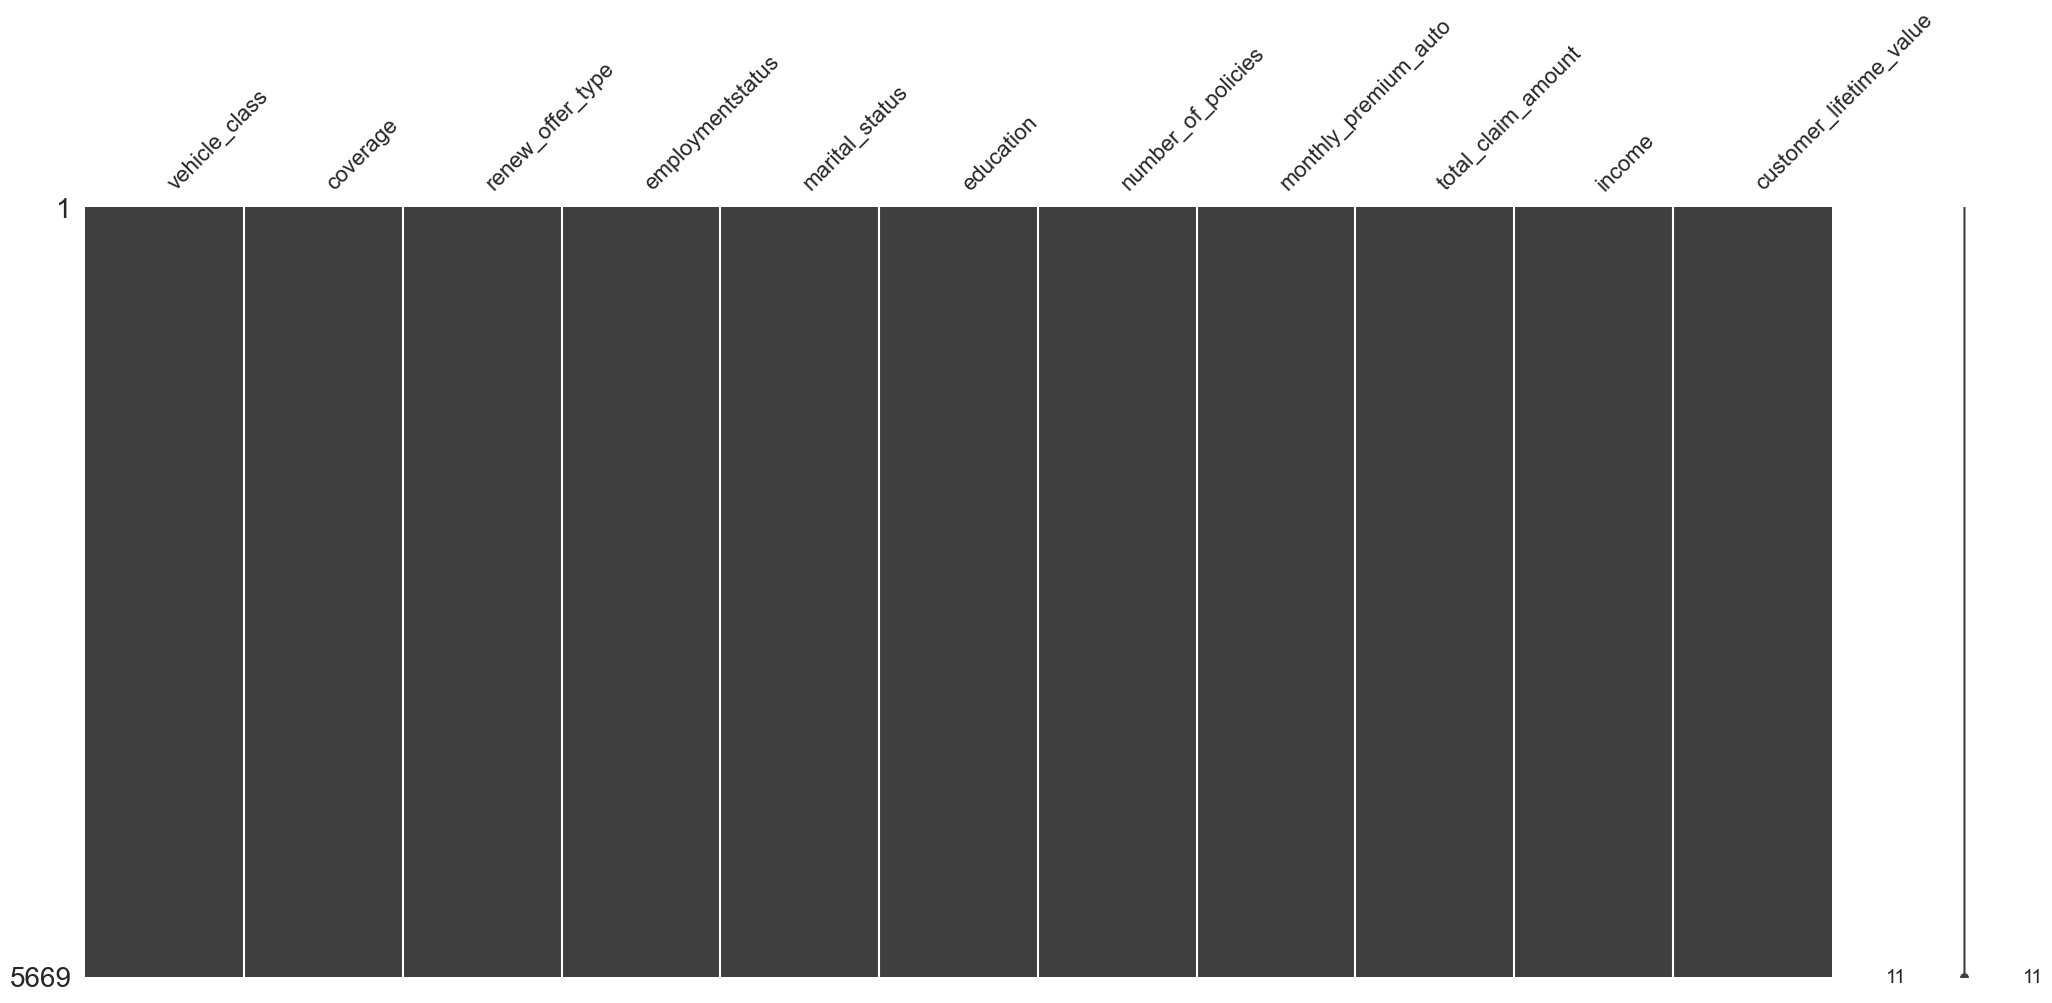

In [213]:
msn.matrix(df)

In [214]:
df.duplicated(subset="customer_lifetime_value", keep = "first").sum()

620

In [215]:
duplicated_data = df[df.duplicated(subset="customer_lifetime_value", keep = "first")]
duplicated_data


,vehicle_class,coverage,renew_offer_type,employmentstatus,marital_status,education,number_of_policies,monthly_premium_auto,total_claim_amount,income,customer_lifetime_value
188,Sports Car,Basic,Offer2,Unemployed,Married,High School or Below,3.0,119.0,571.200000,0.0,9048.983447
256,Four-Door Car,Basic,Offer1,Retired,Single,Bachelor,1.0,63.0,347.857619,24910.0,2248.449633
331,SUV,Basic,Offer2,Employed,Single,Master,1.0,107.0,513.600000,29462.0,4170.687348
362,SUV,Basic,Offer2,Unemployed,Married,Bachelor,1.0,102.0,660.430456,0.0,3567.503755
366,SUV,Extended,Offer1,Unemployed,Single,College,2.0,126.0,604.800000,0.0,13727.799720
...,...,...,...,...,...,...,...,...,...,...,...
5624,Luxury SUV,Premium,Offer1,Retired,Married,Bachelor,1.0,271.0,1300.800000,14290.0,10179.717040
5640,SUV,Extended,Offer2,Unemployed,Married,College,1.0,122.0,725.870693,0.0,4270.034394
5642,Four-Door Car,Extended,Offer2,Employed,Married,College,1.0,95.0,281.110788,93272.0,3861.486269
5654,Four-Door Car,Extended,Offer2,Employed,Married,College,8.0,82.0,393.600000,72608.0,6521.368813


In [216]:
df = df.drop_duplicates(subset='customer_lifetime_value', keep='first')

Dropping the duplicates to prevent bias in the machine learning models and false insights.

In [217]:
# After removing duplicates
df.shape

(5049, 11)

In [218]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
number_of_policies,5049.0,2.992870,2.386643,1.000000,1.000000,2.000000,4.000000,9.000000
monthly_premium_auto,5049.0,92.884135,34.262906,61.000000,68.000000,82.000000,109.000000,297.000000
total_claim_amount,5049.0,429.506991,292.411096,0.423310,251.756739,374.400000,547.912576,2759.794354
income,5049.0,37754.787879,30688.335107,0.000000,0.000000,34335.000000,62473.000000,99934.000000
customer_lifetime_value,5049.0,8060.435309,6990.074953,1898.007675,3964.730745,5837.528088,9028.307862,83325.381190


In [219]:
# Function to check outliers
def calculate_outliers(data, column):
    Q1 = data[column].quantile(.25)
    Q3 = data[column].quantile(.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

numerical_column = ['number_of_policies', 'monthly_premium_auto', 'total_claim_amount', 'income', 'customer_lifetime_value']

In [220]:
outlier_data = []

for i in numerical_column:
    outliers_result, lower_bound, upper_bound = calculate_outliers(df, i)
    total_outlier = len(outliers_result)
    outlier_percentage = round(total_outlier/len(df[i])*100, 2)
    outlier_data.append([i, total_outlier, outlier_percentage, lower_bound, upper_bound])

outlier_df = pd.DataFrame(outlier_data, columns=["column", "total_outlier", "percentage", "lower_bound", "upper_bound"])
outlier_df

,column,total_outlier,percentage,lower_bound,upper_bound
0,number_of_policies,228,4.52,-3.500000,8.500000
1,monthly_premium_auto,251,4.97,6.500000,170.500000
2,total_claim_amount,216,4.28,-192.477016,992.146331
3,income,0,0.00,-93709.500000,156182.500000
4,customer_lifetime_value,449,8.89,-3630.634930,16623.673537


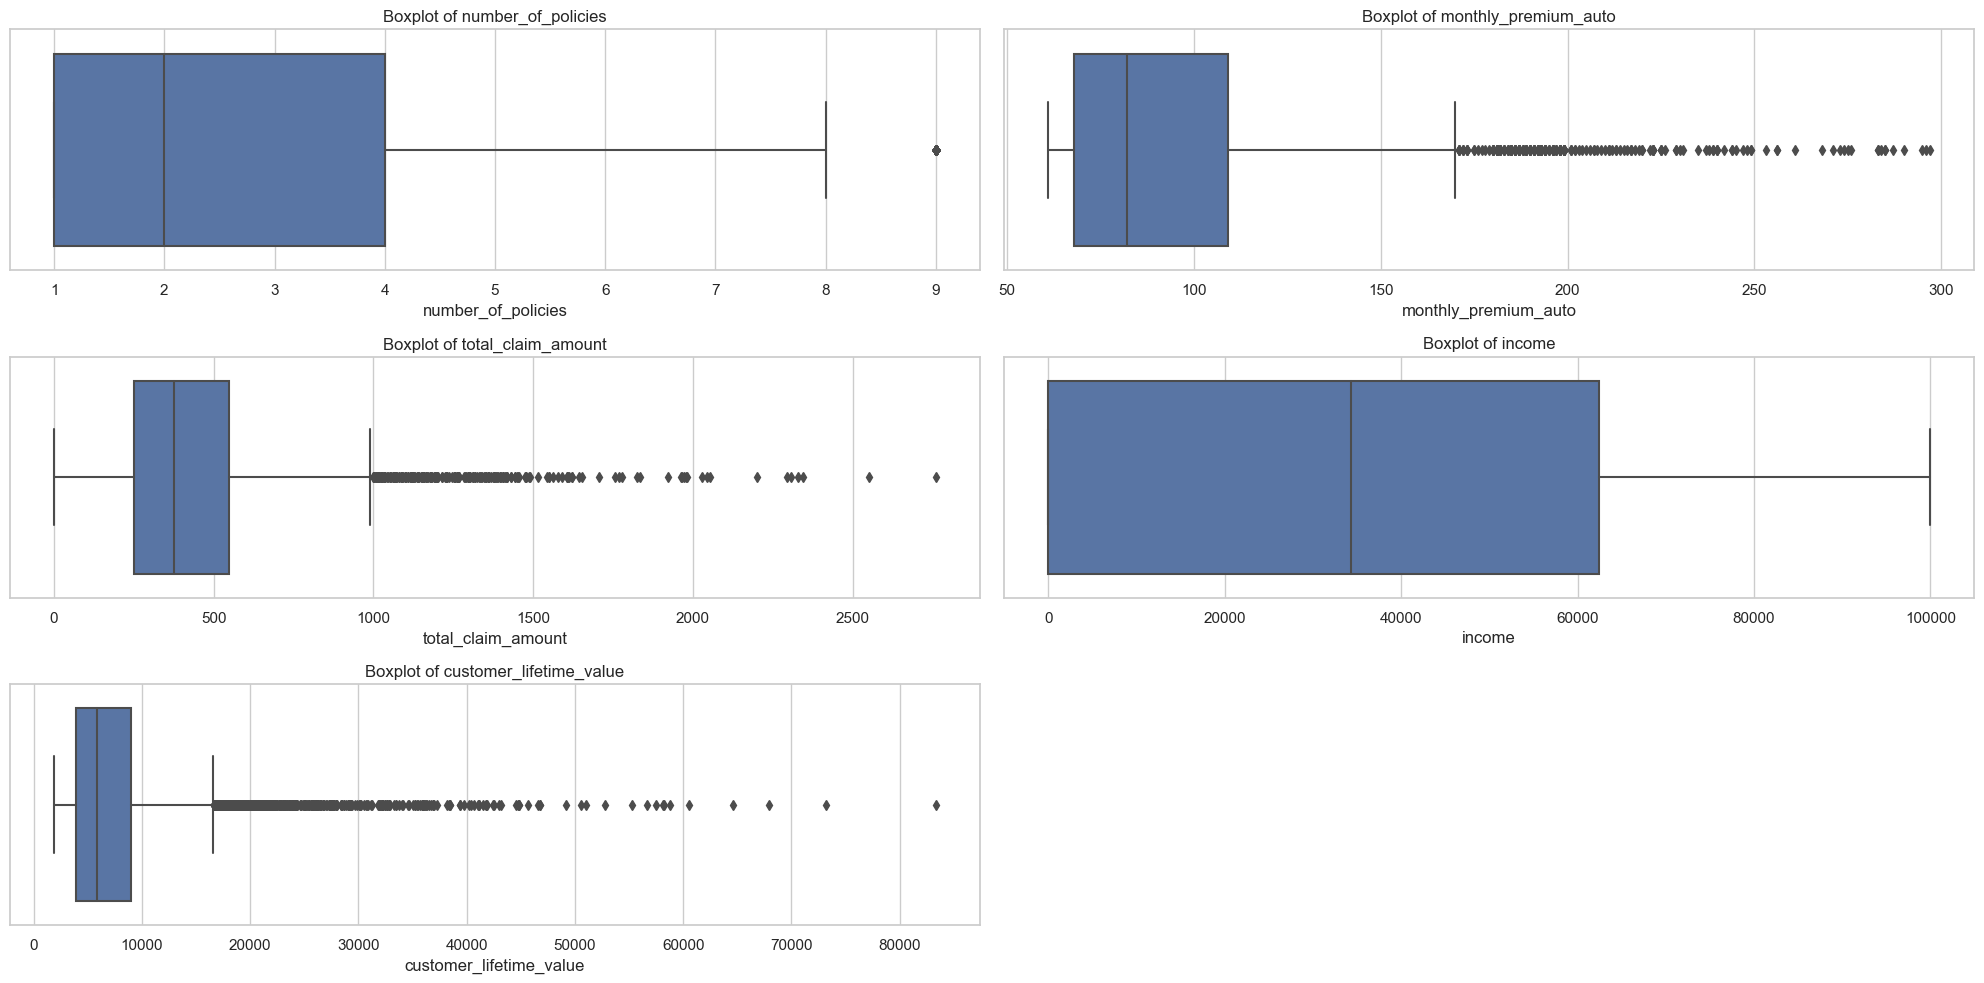

In [221]:
plt.figure(figsize=(20, 10))

# Loop through the columns and create a subplot for each
for i, column in enumerate(numerical_column, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    
plt.tight_layout()
plt.show()

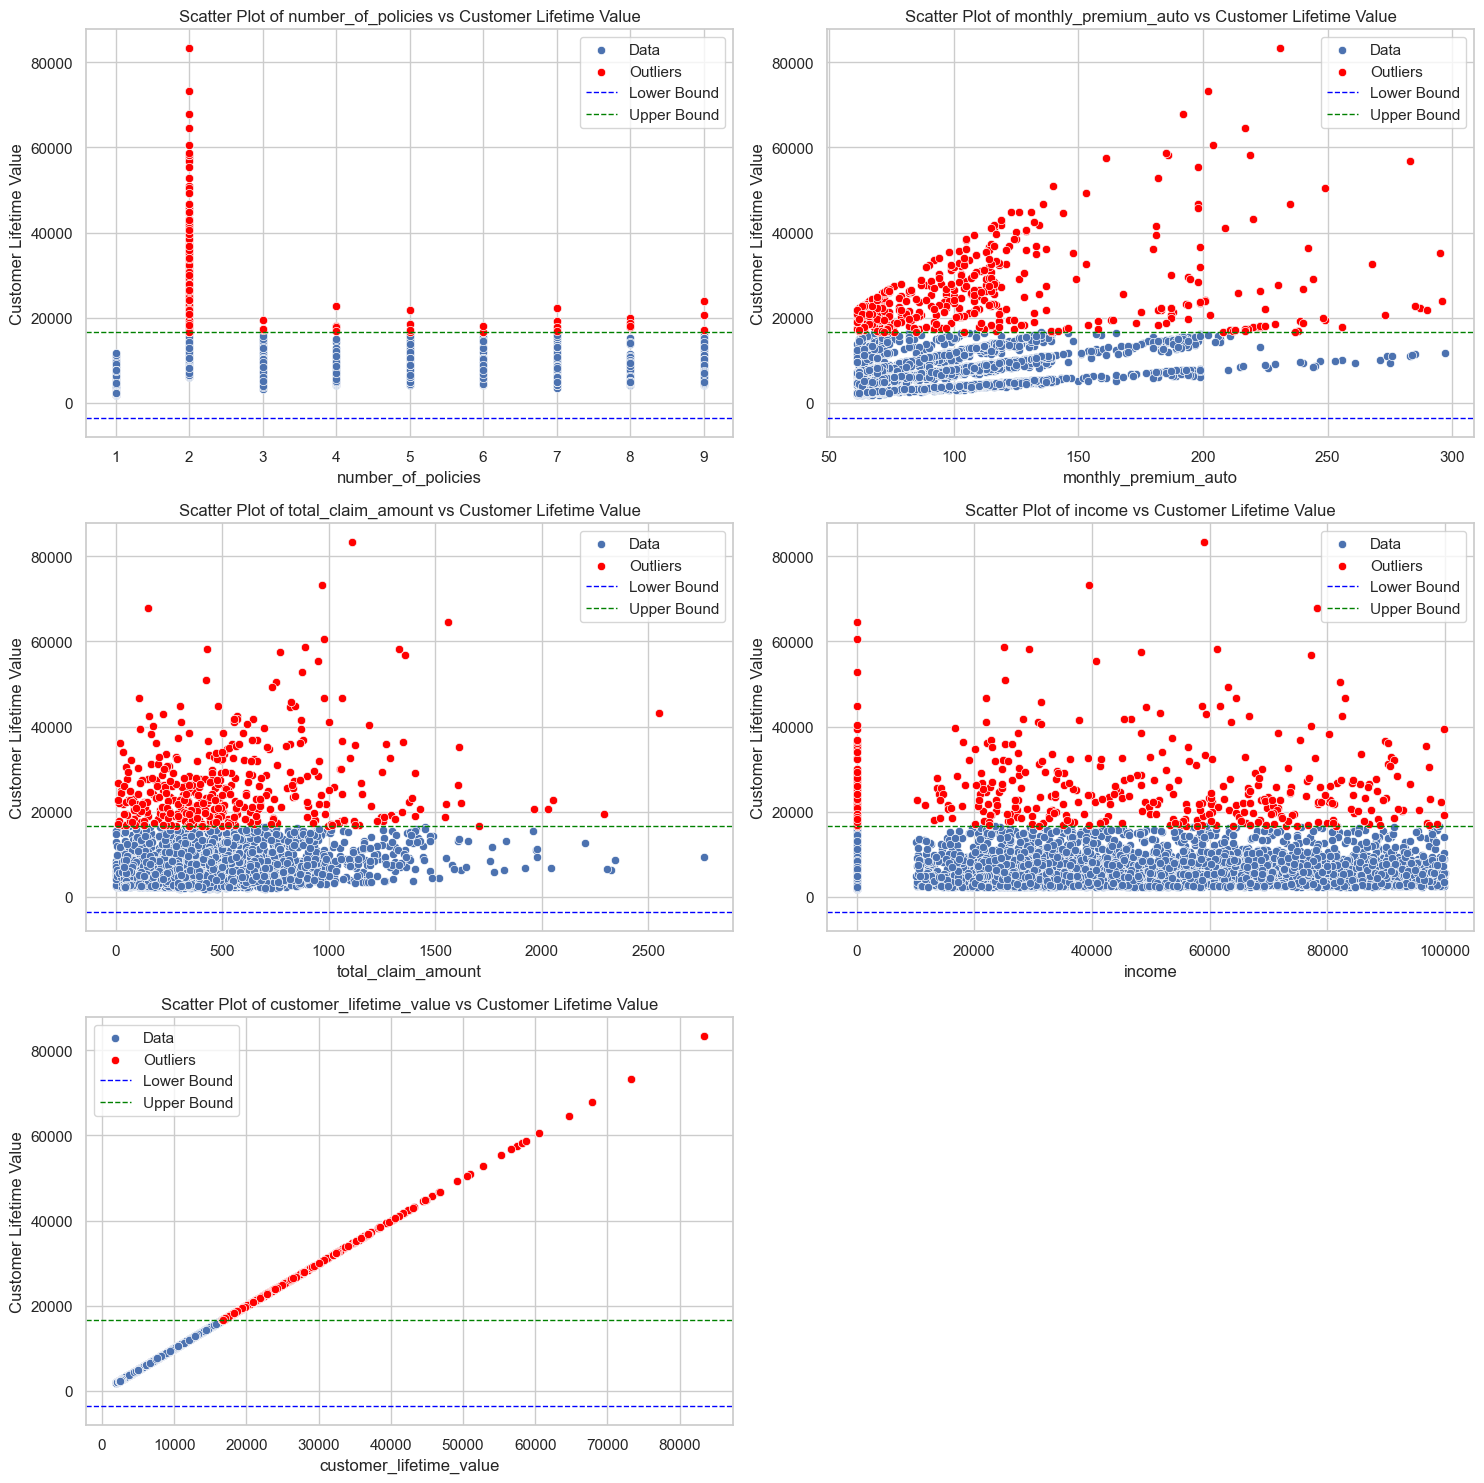

In [222]:
# Determine the grid size for subplots
num_cols = 2
num_rows = int(np.ceil(len(numerical_column) / num_cols))

fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))
fig.tight_layout(pad=5.0)

for i, col in enumerate(numerical_column):
    row, col_pos = divmod(i, num_cols)
    
    # Identify outliers
    outliers, lower_bound, upper_bound = calculate_outliers(df, "customer_lifetime_value")
    
    # Plot all data points
    sns.scatterplot(data=df, x=col, y="customer_lifetime_value", ax=axs[row, col_pos], label='Data')
    
    # Highlight outliers
    sns.scatterplot(data=outliers, x=col, y="customer_lifetime_value", ax=axs[row, col_pos], color='red', label='Outliers')
    
    # Add a horizontal line for lower and upper bounds
    axs[row, col_pos].axhline(lower_bound, color='blue', linestyle='dashed', linewidth=1, label='Lower Bound')
    axs[row, col_pos].axhline(upper_bound, color='green', linestyle='dashed', linewidth=1, label='Upper Bound')
    
    # Add labels and title
    axs[row, col_pos].set_xlabel(col)
    axs[row, col_pos].set_ylabel("Customer Lifetime Value")
    axs[row, col_pos].set_title(f"Scatter Plot of {col} vs Customer Lifetime Value")
    axs[row, col_pos].legend()

# Remove any empty subplots
for j in range(i + 1, num_rows * num_cols):
    fig.delaxes(axs.flatten()[j])

# Adjust layout
plt.tight_layout()
plt.show()

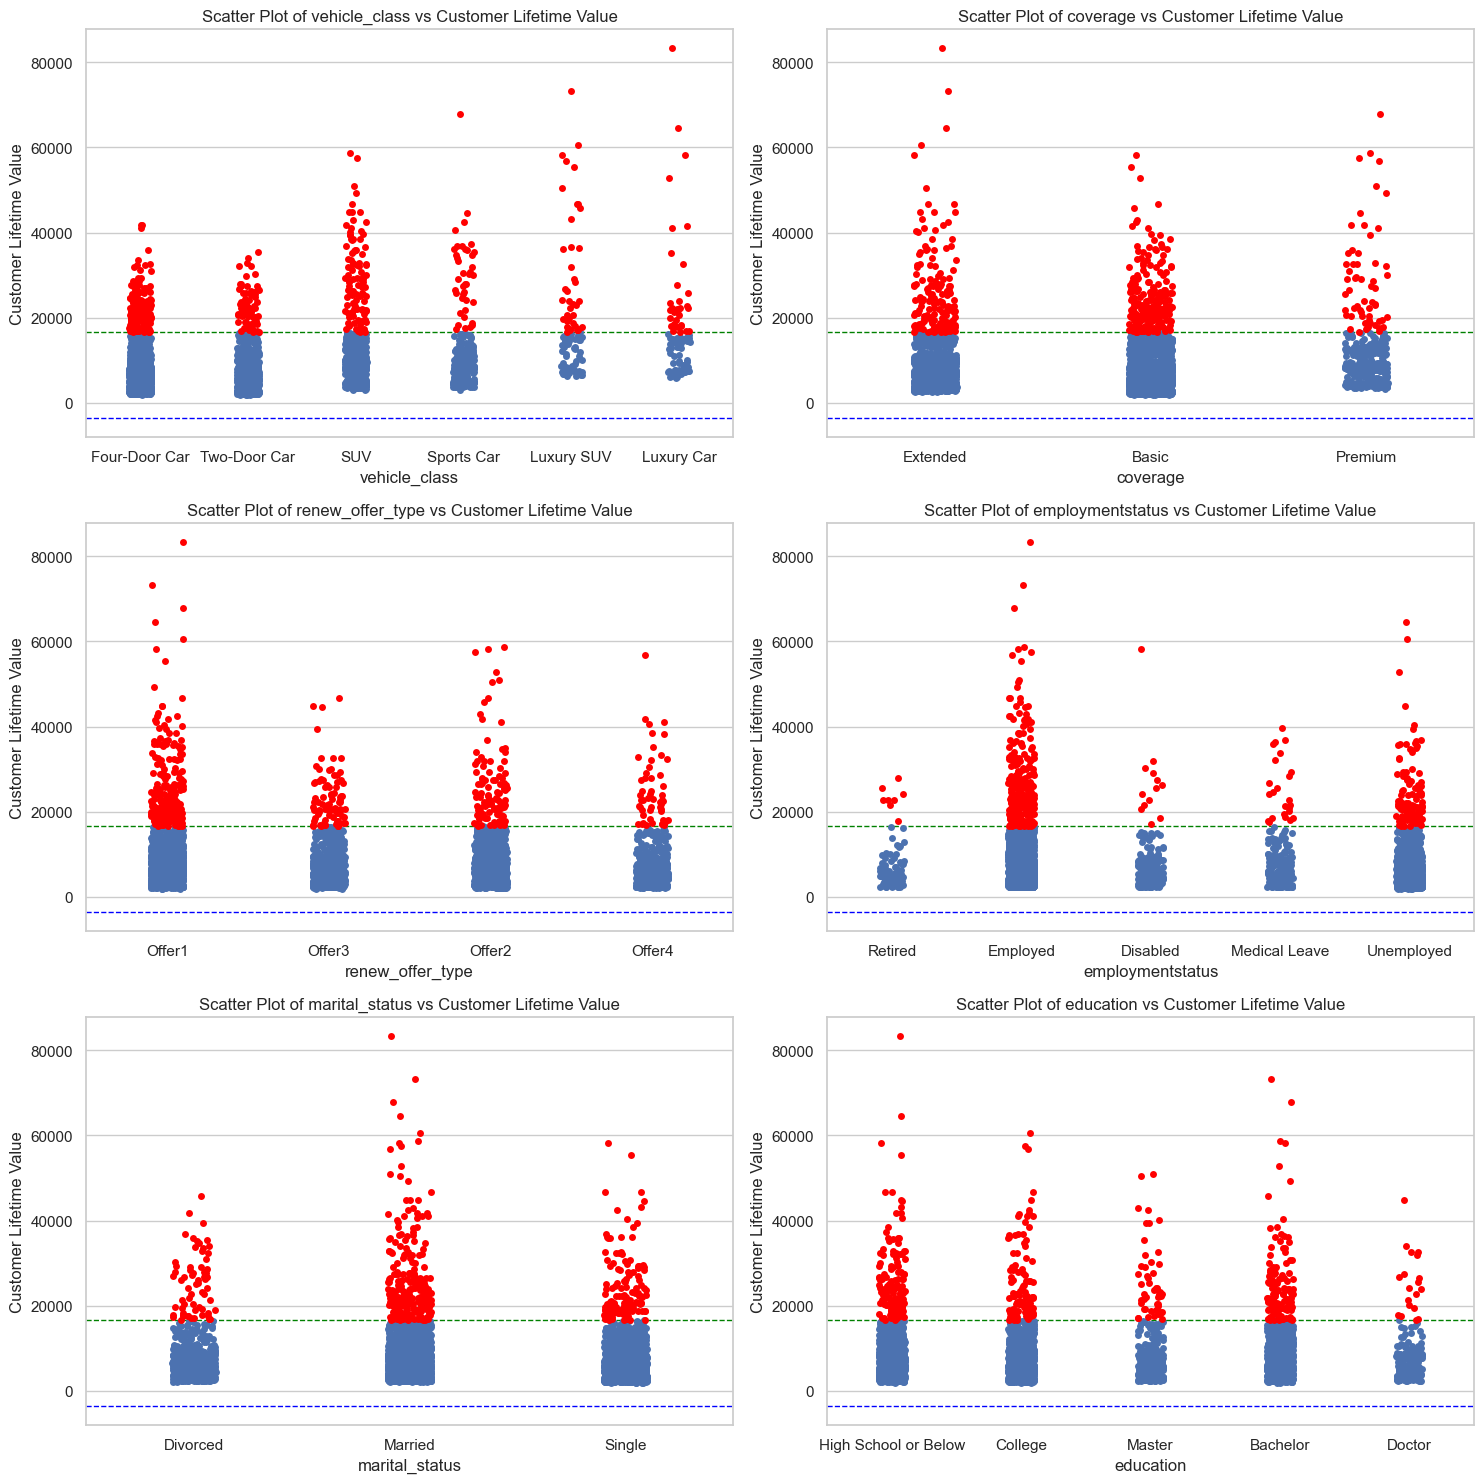

In [223]:
categorical_columns = [
    "vehicle_class",            
    "coverage",                
    "renew_offer_type",         
    "employmentstatus",         
    "marital_status",            
    "education"
]

# Determine the grid size for subplots
num_cols = 2
num_rows = int(np.ceil(len(categorical_columns) / num_cols))

fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))
fig.tight_layout(pad=5.0)

for i, col in enumerate(categorical_columns):
    row, col_pos = divmod(i, num_cols)
    
    # Identify outliers
    outliers, lower_bound, upper_bound = calculate_outliers(df, "customer_lifetime_value")
    
    # Filter out outliers from the main dataframe
    non_outliers = df[(df["customer_lifetime_value"] >= lower_bound) & (df["customer_lifetime_value"] <= upper_bound)]
    
    # Plot non-outliers
    sns.stripplot(data=non_outliers, x=col, y="customer_lifetime_value", ax=axs[row, col_pos], jitter=True)
    
    # Highlight outliers
    sns.stripplot(data=outliers, x=col, y="customer_lifetime_value", ax=axs[row, col_pos], color='red', jitter=True)
    
    # Add a horizontal line for lower and upper bounds
    axs[row, col_pos].axhline(lower_bound, color='blue', linestyle='dashed', linewidth=1)
    axs[row, col_pos].axhline(upper_bound, color='green', linestyle='dashed', linewidth=1)
    
    # Add labels and title
    axs[row, col_pos].set_xlabel(col)
    axs[row, col_pos].set_ylabel("Customer Lifetime Value")
    axs[row, col_pos].set_title(f"Scatter Plot of {col} vs Customer Lifetime Value")

# Remove any empty subplots
for j in range(i + 1, num_rows * num_cols):
    fig.delaxes(axs.flatten()[j])

# Adjust layout
plt.tight_layout()
plt.show()

In [224]:
filtered_df = df[(df["employmentstatus"] == "Unemployed") & (df["income"] == 0)]
filtered_df[["employmentstatus", "income"]]

,employmentstatus,income
16,Unemployed,0.0
17,Unemployed,0.0
21,Unemployed,0.0
24,Unemployed,0.0
26,Unemployed,0.0
...,...,...
5651,Unemployed,0.0
5652,Unemployed,0.0
5655,Unemployed,0.0
5660,Unemployed,0.0


In [225]:
# # Identify outliers
# outliers = df[df["customer_lifetime_value"] > p_95]

# # Create scatter plot for the outliers
# plt.figure(figsize=(10, 6))

# # Plot all data points
# sns.scatterplot(data=df, x="customer_lifetime_value", y="customer_lifetime_value", label='Data', color='blue')

# # Highlight outliers
# sns.scatterplot(data=outliers, x="customer_lifetime_value", y="customer_lifetime_value", color='red', label='Outliers')

# # Add a horizontal line for the 95th percentile
# plt.axhline(p_95, color='purple', linestyle='dashed', linewidth=1, label='95th Percentile')

# # Add labels and title
# plt.xlabel("Customer Lifetime Value")
# plt.ylabel("Customer Lifetime Value")
# plt.title("Scatter Plot of Customer Lifetime Value Outliers")
# plt.legend()

# # Adjust layout and show plot
# plt.tight_layout()
# plt.show()

In [226]:
p_95 = np.percentile(df["customer_lifetime_value"],95)
p_95

21922.198987999996

In [227]:
p_95 = np.percentile(df["customer_lifetime_value"],95)
df[df["customer_lifetime_value"] > p_95]["customer_lifetime_value"].count()

253

253 outlier data will ber removed.

In [228]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
number_of_policies,5049.0,2.992870,2.386643,1.000000,1.000000,2.000000,4.000000,9.000000
monthly_premium_auto,5049.0,92.884135,34.262906,61.000000,68.000000,82.000000,109.000000,297.000000
total_claim_amount,5049.0,429.506991,292.411096,0.423310,251.756739,374.400000,547.912576,2759.794354
income,5049.0,37754.787879,30688.335107,0.000000,0.000000,34335.000000,62473.000000,99934.000000
customer_lifetime_value,5049.0,8060.435309,6990.074953,1898.007675,3964.730745,5837.528088,9028.307862,83325.381190


In [229]:
correlation_matrix = df[numerical_column].corr()

# Filter for correlations with "customer_lifetime_value"
correlation_with_clv = correlation_matrix[['customer_lifetime_value']]

correlation_with_clv.sort_values(by="customer_lifetime_value", ascending=False)

,customer_lifetime_value
customer_lifetime_value,1.000000
monthly_premium_auto,0.417810
total_claim_amount,0.212340
income,0.036844
number_of_policies,0.022034


In [230]:
df.describe(include="object").T

,count,unique,top,freq
vehicle_class,5049,6,Four-Door Car,2565
coverage,5049,3,Basic,3099
renew_offer_type,5049,4,Offer1,2019
employmentstatus,5049,5,Employed,3187
marital_status,5049,3,Married,2986
education,5049,5,Bachelor,1529


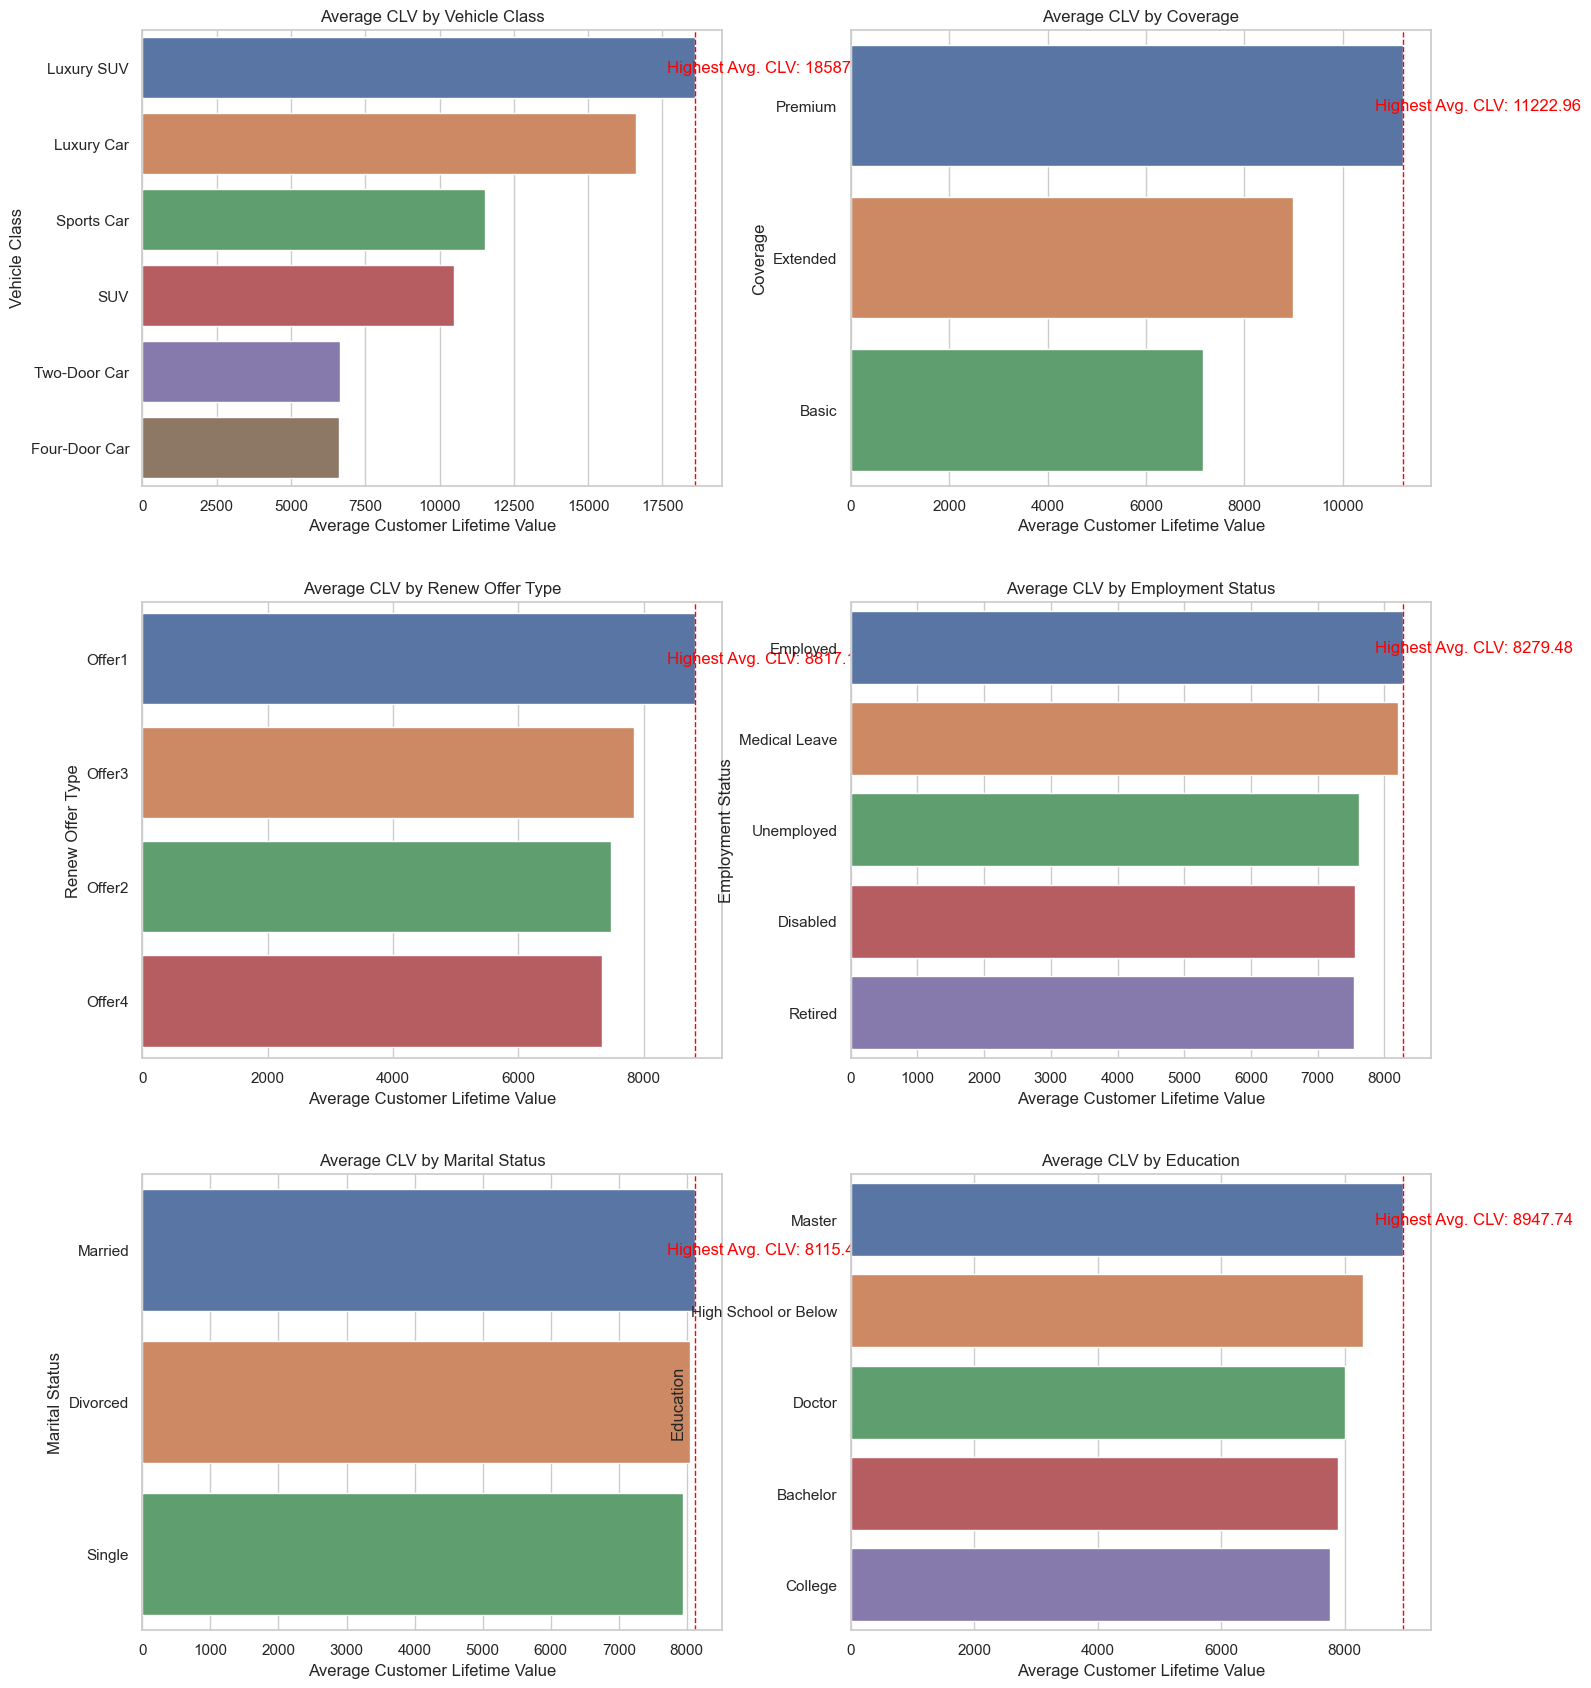

In [231]:
fig, axs = plt.subplots(3, 2, figsize=(15, 18))
fig.tight_layout(pad=5.0)

# List of categories to plot
categories = [
    ("vehicle_class", "Vehicle Class"),
    ("coverage", "Coverage"),
    ("renew_offer_type", "Renew Offer Type"),
    ("employmentstatus", "Employment Status"),
    ("marital_status", "Marital Status"),
    ("education", "Education")
]

for i, (col, title) in enumerate(categories):
    row, col_pos = divmod(i, 2)
    
    # Calculate mean CLV per category
    mean_df = df.groupby(col)["customer_lifetime_value"].mean().reset_index().sort_values(by="customer_lifetime_value", ascending=False)
    highest_avg_clv = mean_df["customer_lifetime_value"].max()

    # Create the horizontal bar plot with mean values
    sns.barplot(data=mean_df, x="customer_lifetime_value", y=col, ax=axs[row, col_pos])

    # Add the horizontal line
    axs[row, col_pos].axvline(highest_avg_clv, color='red', linestyle='dashed', linewidth=1)

    # Add a text label to the line
    axs[row, col_pos].text(highest_avg_clv * 0.95, 0, f'Highest Avg. CLV: {highest_avg_clv:.2f}', color='red', va='center')

    # Add labels and title
    axs[row, col_pos].set_ylabel(title)
    axs[row, col_pos].set_xlabel("Average Customer Lifetime Value")
    axs[row, col_pos].set_title(f"Average CLV by {title}")

# Show the plot
plt.show()

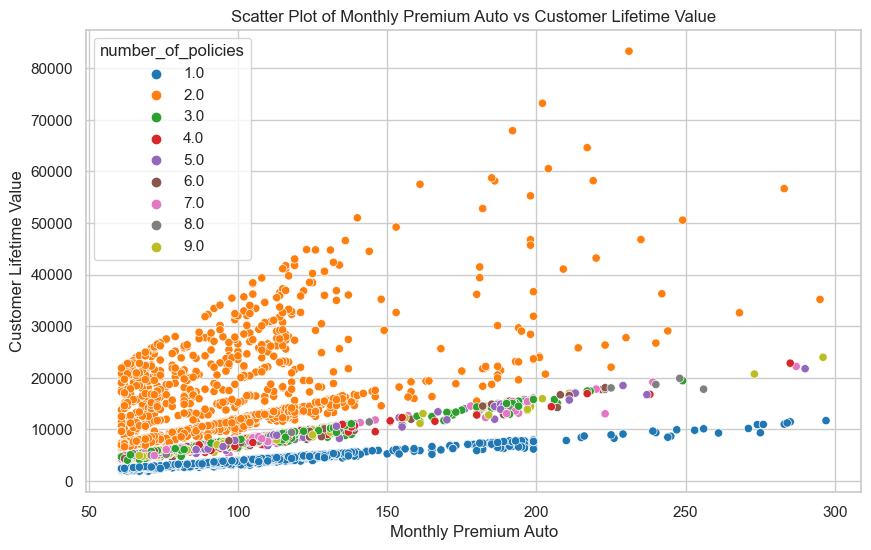

In [232]:
number_of_policies_cat = df['number_of_policies'].astype('category')

plt.figure(figsize=(10, 6))
scatter_plot = sns.scatterplot(
    data=df,
    x='monthly_premium_auto',
    y='customer_lifetime_value',
    hue=number_of_policies_cat,
    palette='tab10'
)

# Adding labels and title
scatter_plot.set_title('Scatter Plot of Monthly Premium Auto vs Customer Lifetime Value')
scatter_plot.set_xlabel('Monthly Premium Auto')
scatter_plot.set_ylabel('Customer Lifetime Value')

# Show the plot
plt.show()

Insights from Exploratory Data Analysis :

1. Numerical features that has the highest correlation with customer lifetime value is monthly premium auto with the correlation value of 0.417810, which is not a very strong positive correlation.
2. Numerical features that has the lowest correlation with customer lifetime value is income with the correaltion value of 0.022034.
3. Cutomers with the vehicle class "Luxury SUV" has the highest average customer lifetime value of 18587, followed by "Luxury Car"
4. Customers with premium coverage has the highest average customer lifetime value of 11222.96, followed by extended coverage.
5. Customers that receive offer1 from renew offer type has the highest average customer lifetime value of 8817.
6. Employed customers has the highest average customer lifetime value of 8279.48, even though there are not a big differences with the other employment status.
7. Customers that are married has the highest average customer lifetime value of 8115.4, even though there are not a big differences between the marital status.
8. Customers that has a master's degree has the highest average customer lifetime value of 8947.74, even though there are not a big differences with the other level of education amongs customers.
9. Customer with very high CLV typically holds two (2) number of policies. But more data needed to understand why is this happening. And customers with low number of CLV typically hold only one number of pokicies.
10. Zero income customers are not anomaly since they are unemployed in the status, so keeping the data is the decision.
11. Customer lifetime value average is 8060.435309, we assume above that are potential customers.

Outliers decision :

The scatterplot analysis reveals a concentration of customers with exceptionally high Customer Lifetime Value (CLV), primarily those holding two Purwadhika Auto Insurance policies. While these high-CLV customers present an opportunity for further analysis to understand the drivers of their value, our current focus is on developing a machine learning model to effectively identify and retain customers with low CLV to prevent churn and medium to high (above average CLV) to identify potential customers in the long term. To optimize the model's performance on this specific target group, we will temporarily exclude customers exceeding the 95th percentile of CLV (above 21922 CLV value). This strategic exclusion will enable us to refine the model while preserving the valuable data associated with our high-value customers for future investigation.

> ### 4. Model Experiment

**4.1 Preprocessing and Feature Engineering**

In [233]:
# Removing outliers that are above 95 percentile
df = df[df["customer_lifetime_value"] <= p_95].copy()
df

,vehicle_class,coverage,renew_offer_type,employmentstatus,marital_status,education,number_of_policies,monthly_premium_auto,total_claim_amount,income,customer_lifetime_value
0,Four-Door Car,Extended,Offer1,Retired,Divorced,High School or Below,2.0,90.0,571.479602,11828.0,10083.486880
1,Four-Door Car,Basic,Offer1,Employed,Married,College,6.0,62.0,114.514440,44762.0,4943.386117
2,Two-Door Car,Basic,Offer1,Retired,Married,Master,2.0,62.0,257.248789,21514.0,11981.984810
3,Four-Door Car,Premium,Offer3,Disabled,Married,High School or Below,1.0,116.0,556.800000,17913.0,4550.856045
4,Two-Door Car,Basic,Offer3,Medical Leave,Married,High School or Below,1.0,62.0,355.820799,19030.0,2372.155492
...,...,...,...,...,...,...,...,...,...,...,...
5663,Four-Door Car,Basic,Offer1,Employed,Married,High School or Below,2.0,69.0,446.084760,30595.0,8114.409136
5664,Four-Door Car,Basic,Offer4,Unemployed,Single,High School or Below,1.0,74.0,532.800000,0.0,2442.216651
5665,Four-Door Car,Premium,Offer1,Employed,Divorced,Bachelor,2.0,109.0,523.200000,27778.0,12904.943360
5666,Four-Door Car,Basic,Offer1,Employed,Single,Bachelor,1.0,62.0,44.780402,84658.0,2447.053134


In [234]:
# Assigning column for ordinal encoding
vehicle_class_categories = ['Two-Door Car', 'Four-Door Car', 'SUV', 'Sports Car', 'Luxury SUV', 'Luxury Car']
coverage_categories = ['Basic', 'Extended', 'Premium']
renew_offer_type_categories = ['Offer1', 'Offer2', 'Offer3', 'Offer4']
education_categories = ['High School or Below', 'College', 'Bachelor', 'Master', 'Doctor']

In [235]:
# Data spliting between features and target
X = df.drop('customer_lifetime_value', axis=1)
y = df["customer_lifetime_value"]

# split
X_train, X_test, y_train, y_test = train_test_split(
    X,y,
    test_size = 0.2,
    random_state = 14
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3836, 10), (960, 10), (3836,), (960,))

In [259]:
# Transformer for OLS, Linear, Ridge, Lasso
transformer_1 = ColumnTransformer([
    ("onehot", OneHotEncoder(drop="first", handle_unknown="ignore"), ["employmentstatus", "marital_status", "number_of_policies"]),
    ('ordinal', OrdinalEncoder(handle_unknown="ignore", categories=[vehicle_class_categories, coverage_categories, renew_offer_type_categories, education_categories]), ['vehicle_class', 'coverage', 'renew_offer_type', 'education']),
    ("scaler", MinMaxScaler(), ["monthly_premium_auto", "total_claim_amount", "income"])
], remainder="passthrough")

# Transformer for Tree based model
transformer_2 = ColumnTransformer([
    ("onehot", OneHotEncoder(drop="first", handle_unknown="ignore"), ["employmentstatus", "marital_status"]),
    ('ordinal', OrdinalEncoder(handle_unknown="ignore", categories=[vehicle_class_categories, coverage_categories, renew_offer_type_categories, education_categories]), ['vehicle_class', 'coverage', 'renew_offer_type', 'education'])
], remainder="passthrough")

transformer_knn = ColumnTransformer([
    ("onehot", OneHotEncoder(drop="first", handle_unknown="ignore"), ["employmentstatus", "marital_status"]),
    ('ordinal', OrdinalEncoder(handle_unknown="ignore", categories=[vehicle_class_categories, coverage_categories, renew_offer_type_categories, education_categories]), ['vehicle_class', 'coverage', 'renew_offer_type', 'education']),
    ("scaler", MinMaxScaler(), ["monthly_premium_auto", "total_claim_amount", "income"])
], remainder="passthrough")

**Feature Engineering Summary**
- Outliers removed are the above 95 percentile. The reasoning are in the EDA summary.
- We have decided to transform the number_of_policies with one hot encoders since in the data analysis we found that customers with very high CLV typically holds two number of policies, while customers with low CLV typically hold only one number of policies. And this will help boost the performance of the linear model.
- Do ordinal encoding for the rest of the ordinal data
- We using MinMAxScaler as of we comparing features that are the same unit and we want to preserve the data distribution.
- Not doing any scaling in transformer_2 for the tree based model since it can capture a complexity of the data.

In [237]:
# Reset indices to ensure alignment
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [238]:
transformer_1

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehot', OneHotEncoder(drop='first'),
                                 ['employmentstatus', 'marital_status',
                                  'number_of_policies']),
                                ('ordinal',
                                 OrdinalEncoder(categories=[['Two-Door Car',
                                                             'Four-Door Car',
                                                             'SUV',
                                                             'Sports Car',
                                                             'Luxury SUV',
                                                             'Luxury Car'],
                                                            ['Basic',
                                                             'Extended',
                                                             'Premium'],
                                                            ['Offer1', 'Offer2',
                                                             'Offer3',
                                                             'Offer4'],
                                                            ['High School or '
                                                             'Below',
                                                             'College',
                                                             'Bachelor',
                                                             'Master',
                                                             'Doctor']]),
                                 ['vehicle_class', 'coverage',
                                  'renew_offer_type', 'education']),
                                ('scaler', MinMaxScaler(),
                                 ['monthly_premium_auto', 'total_claim_amount',
                                  'income'])])

In [239]:
# Data Transformation
X_train_preprocess = transformer_1.fit_transform(X_train)
X_test_preprocess = transformer_1.transform(X_test)

In [240]:
X_train_preprocess = pd.DataFrame(X_train_preprocess)
X_test_preprocess = pd.DataFrame(X_test_preprocess)

In [241]:
# Getting the column name back
transformer_1.transformers_

[('onehot',
  OneHotEncoder(drop='first'),
  ['employmentstatus', 'marital_status', 'number_of_policies']),
 ('ordinal',
  OrdinalEncoder(categories=[['Two-Door Car', 'Four-Door Car', 'SUV',
                              'Sports Car', 'Luxury SUV', 'Luxury Car'],
                             ['Basic', 'Extended', 'Premium'],
                             ['Offer1', 'Offer2', 'Offer3', 'Offer4'],
                             ['High School or Below', 'College', 'Bachelor',
                              'Master', 'Doctor']]),
  ['vehicle_class', 'coverage', 'renew_offer_type', 'education']),
 ('scaler',
  MinMaxScaler(),
  ['monthly_premium_auto', 'total_claim_amount', 'income'])]

In [242]:
feature_names = transformer_1.transformers_[0][1].get_feature_names_out()
feature_names

array(['employmentstatus_Employed', 'employmentstatus_Medical Leave',
       'employmentstatus_Retired', 'employmentstatus_Unemployed',
       'marital_status_Married', 'marital_status_Single',
       'number_of_policies_2.0', 'number_of_policies_3.0',
       'number_of_policies_4.0', 'number_of_policies_5.0',
       'number_of_policies_6.0', 'number_of_policies_7.0',
       'number_of_policies_8.0', 'number_of_policies_9.0'], dtype=object)

In [243]:
feature_names_2 = transformer_1.transformers_[1][1].get_feature_names_out()
feature_names_2

array(['vehicle_class', 'coverage', 'renew_offer_type', 'education'],
      dtype=object)

In [244]:
features = list(feature_names) + list(feature_names_2) + ["monthly_premium_auto", "total_claim_amount", "income"]
X_train_preprocess.columns = features
X_test_preprocess.columns = features
display(X_train_preprocess, X_test_preprocess)

,employmentstatus_Employed,employmentstatus_Medical Leave,employmentstatus_Retired,employmentstatus_Unemployed,marital_status_Married,marital_status_Single,number_of_policies_2.0,number_of_policies_3.0,number_of_policies_4.0,number_of_policies_5.0,...,number_of_policies_7.0,number_of_policies_8.0,number_of_policies_9.0,vehicle_class,coverage,renew_offer_type,education,monthly_premium_auto,total_claim_amount,income
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,2.0,0.008475,0.031230,0.674155
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,4.0,0.000000,0.049239,0.704585
2,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.046610,0.125093,0.000000
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.004237,0.030251,0.629415
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,3.0,1.0,0.0,2.0,0.326271,0.339965,0.214642
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3831,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.580508,0.571598,0.000000
3832,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.016949,0.169450,0.000000
3833,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.042373,0.185106,0.000000
3834,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.029661,0.249643,0.000000


,employmentstatus_Employed,employmentstatus_Medical Leave,employmentstatus_Retired,employmentstatus_Unemployed,marital_status_Married,marital_status_Single,number_of_policies_2.0,number_of_policies_3.0,number_of_policies_4.0,number_of_policies_5.0,...,number_of_policies_7.0,number_of_policies_8.0,number_of_policies_9.0,vehicle_class,coverage,renew_offer_type,education,monthly_premium_auto,total_claim_amount,income
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.483051,0.301753,0.904027
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.067797,0.100561,0.395081
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.161017,0.172060,0.000000
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,2.0,0.101695,0.022418,0.397803
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,2.0,1.0,0.105932,0.062511,0.998819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.072034,0.135530,0.785839
956,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,2.0,1.0,0.029661,0.093017,0.576250
957,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.055085,0.128572,0.199622
958,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.025424,0.019644,0.326485


**4.2 Ordinary Least Square**

In [245]:
ols = sm.OLS(y_train, sm.add_constant(X_train_preprocess))
results = ols.fit()

In [246]:
# summary
print(results.summary())

                               OLS Regression Results                              
Dep. Variable:     customer_lifetime_value   R-squared:                       0.793
Model:                                 OLS   Adj. R-squared:                  0.792
Method:                      Least Squares   F-statistic:                     695.2
Date:                     Thu, 18 Jul 2024   Prob (F-statistic):               0.00
Time:                             12:04:34   Log-Likelihood:                -34361.
No. Observations:                     3836   AIC:                         6.877e+04
Df Residuals:                         3814   BIC:                         6.890e+04
Df Model:                               21                                         
Covariance Type:                 nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

In [247]:
y_pred = results.predict(sm.add_constant(X_test_preprocess))

In [248]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
percentage_errors = (y_test - y_pred) / y_test
rmspe = np.sqrt(np.mean(np.square(percentage_errors))) * 100
Adjusted_R2 = results.rsquared_adj

In [249]:
print("\nMetrics Evaluation OLS:")
print(f"RMSE: {rmse}")
print(f"RMSPE: {rmspe}")
print(f"Adjusted R2: {Adjusted_R2}")


Metrics Evaluation OLS:
RMSE: 1786.2183498175154
RMSPE: 18.439023814830282
Adjusted R2: 0.7917242904002528


**OLS Summary**

1. Dependent Variable: customer_lifetime_value
2. R-squared: 0.793

This means that approximately 79.3% of the variability in the dependent variable (customer lifetime value) is explained by the independent variables in the model.

3. Adjusted R-squared: 0.792

The adjusted R-squared is slightly lower than the R-squared, which adjusts for the number of predictors in the model. This indicates that the model is not overfitting despite the number of predictors.

4. F-statistic: 695.2

The F-statistic is very high, and the associated p-value is 0.00, indicating that the overall model is statistically significant.

**Coefficients and Statistical Significance**

1. const (Intercept): 1043.7037

This is the expected customer lifetime value when all other variables are zero. It is statistically significant (p-value < 0.05).

2. employmentstatus_Employed: 481.0825

Being employed increases the customer lifetime value by approximately 481.08 units, significant at the 0.05 level (p-value = 0.003).

3. employmentstatus_Medical Leave: 693.7642

Being on medical leave increases the customer lifetime value by approximately 693.76 units, significant at the 0.05 level (p-value = 0.001).

4. employmentstatus_Retired: 110.3833

Being retired increases the customer lifetime value by approximately 110.38 units, but this effect is not statistically significant (p-value = 0.712).

5. employmentstatus_Unemployed: 176.9982

Being unemployed increases the customer lifetime value by approximately 177 units, but this effect is not statistically significant (p-value = 0.277).

6. marital_status_Married: 178.7015

Being married increases the customer lifetime value by approximately 178.70 units, which is borderline significant (p-value = 0.053).

7. marital_status_Single: 30.9562

Being single increases the customer lifetime value by approximately 30.96 units, but this effect is not statistically significant (p-value = 0.774).

8. number_of_policies_2.0: 8913.8361

Having 2 policies increases the customer lifetime value by approximately 8913.84 units, highly significant (p-value < 0.001).

9. number_of_policies_3.0: 3546.8446

Having 3 policies increases the customer lifetime value by approximately 3546.84 units, highly significant (p-value < 0.001).

10. number_of_policies_4.0 - 9.0

Similar to the previous variables, having 4 to 9 policies increases the customer lifetime value significantly, with p-values < 0.001.

11. vehicle_class: 37.7242

The effect of vehicle class is positive but not statistically significant (p-value = 0.541).

12. coverage: 35.2583

The effect of coverage is positive but not statistically significant (p-value = 0.597).

13. renew_offer_type: 30.9311

The effect of renew offer type is positive but not statistically significant (p-value = 0.306).

14. education: 14.2804

The effect of education is positive but not statistically significant (p-value = 0.619).

15. monthly_premium_auto: 14310.0

Monthly premium auto is a highly significant predictor with a large positive effect (p-value < 0.001).

16. total_claim_amount: -618.0970

Total claim amount has a negative effect on customer lifetime value, but it is not statistically significant (p-value = 0.153).

17. income: 219.6325

Income has a positive effect on customer lifetime value, but it is not statistically significant (p-value = 0.210).

**Metrics Evaluation OLS**
1. RMSE: 1786.218

The Root Mean Squared Error (RMSE) is 1786.218, which gives an idea of the average magnitude of the errors between the predicted and actual values.

2. RMSPE: 18.439%

The Root Mean Squared Percentage Error (RMSPE) is 18.439%. This metric gives an idea of the error magnitude relative to the actual values. 

3. Adjusted R²: 0.792

The Adjusted R² value of 0.792 indicates that approximately 79.2% of the variability in the customer lifetime value is explained by the model, adjusted for the number of predictors. This suggests a good fit of the model.

**4.3 Finding the best model | Linear Model**

In [250]:
# Model
linreg = LinearRegression()
ridge = Ridge(alpha=0.001)
lasso = Lasso(alpha=0.001)
knn = KNeighborsRegressor()
dtree = DecisionTreeRegressor(random_state=0)
rf = RandomForestRegressor(random_state=0)
gboost = GradientBoostingRegressor(random_state=0)
xgboost = XGBRegressor()
lgbr = lgb.LGBMRegressor()
catboost = CatBoostRegressor()

In [251]:
# Define RMSPE scorer
def rmspe(y_true, y_pred):
    return np.sqrt(np.mean(np.square((y_true - y_pred) / y_true))) * 100

rmspe_scorer = make_scorer(rmspe, greater_is_better=False)

In [252]:
# Linear Model Benchmark
# Train the data

models = [linreg, ridge, lasso]
model_name = []
rmse_mean = []
rmse_std = []
rmspe_mean = []
rmspe_std = []

poly = PolynomialFeatures(degree=3, include_bias=False, interaction_only=False)
poly_features = ["monthly_premium_auto", "total_claim_amount", "income"]
other_features = [col for col in X_train_preprocess.columns if col not in poly_features] 

for model in models:

    preprocessor = ColumnTransformer(
        transformers=[
            ("poly", poly, poly_features),
            ("passthrough", "passthrough", other_features)
        ]
    )
    model_pipeline = Pipeline([
        ("preprocessor", preprocessor),  
        ("modeling", model)
    ])

    kfold = KFold(n_splits=10)

    # RMSE Cross-validation
    rmse_cv = cross_val_score(
        model_pipeline,
        X_train_preprocess,
        y_train,
        cv=kfold,
        scoring='neg_root_mean_squared_error',
        error_score='raise'
    )

    # RMSPE Cross-validation
    rmspe_cv = cross_val_score(
        model_pipeline,
        X_train_preprocess,
        y_train,
        cv=kfold,
        scoring=rmspe_scorer,
        error_score='raise'
    )

    # Store results
    model_name.append(model.__class__.__name__)
    rmse_mean.append(abs(rmse_cv.mean()))
    rmse_std.append(rmse_cv.std())
    rmspe_mean.append(abs(rmspe_cv.mean()))
    rmspe_std.append(rmspe_cv.std())



In [253]:
train_score = pd.DataFrame({
    'model': model_name,
    'rmse_mean': rmse_mean,
    'rmse_std': rmse_std,
    'rmspe_mean': rmspe_mean,
    'rmspe_std': rmspe_std
}).sort_values(by='rmse_mean', ascending=True)
train_score

,model,rmse_mean,rmse_std,rmspe_mean,rmspe_std
1,Ridge,1887.022395,147.467278,19.457693,0.363001
2,Lasso,1887.050366,146.612719,19.442701,0.350317
0,LinearRegression,1887.511630,148.076963,19.466131,0.379114


In [254]:
test_predict_rmse = []
test_predict_rmspe = []
model_name = []

for model in models:
    preprocessor = ColumnTransformer(
        transformers=[
            ("poly", poly, poly_features),
            ("passthrough", "passthrough", other_features)
        ]
    )
    model_pipeline = Pipeline([
        ("preprocessor", preprocessor),  
        ("modeling", model)
    ])

    model_pipeline.fit(X_train_preprocess, y_train)
    y_pred = model_pipeline.predict(X_test_preprocess)

    # Calculate RMSE
    rmse_result = np.sqrt(mean_squared_error(y_test, y_pred))
    test_predict_rmse.append(rmse_result)

    # Calculate RMSPE
    rmspe_result = np.sqrt(np.mean(np.square((y_test - y_pred) / y_test))) * 100
    test_predict_rmspe.append(rmspe_result)

    model_name.append(model.__class__.__name__)

# Create DataFrame for results
benchmark_model_test = pd.DataFrame({
    "model": model_name,
    "rmse_test": test_predict_rmse,
    "rmspe_test": test_predict_rmspe
}).sort_values(by="rmse_test", ascending=True)

benchmark_model_test

,model,rmse_test,rmspe_test
2,Lasso,1773.179708,18.463594
1,Ridge,1773.386760,18.497386
0,LinearRegression,1773.524274,18.506623


In [255]:
benchmark_model = benchmark_model_test.set_index('model').join(train_score.set_index('model'))
if 'std' in benchmark_model.columns:
    benchmark_model.drop('std', axis=1, inplace=True)
benchmark_model['rmse_diff'] = (benchmark_model['rmse_test'] - benchmark_model['rmse_mean']).abs()
benchmark_model['rmspe_diff'] = (benchmark_model['rmspe_test'] - benchmark_model['rmspe_mean']).abs()
benchmark_model = benchmark_model.sort_values(by='rmse_test', ascending=True)
benchmark_model

,rmse_test,rmspe_test,rmse_mean,rmse_std,rmspe_mean,rmspe_std,rmse_diff,rmspe_diff
model,,,,,,,,
Lasso,1773.179708,18.463594,1887.050366,146.612719,19.442701,0.350317,113.870658,0.979107
Ridge,1773.386760,18.497386,1887.022395,147.467278,19.457693,0.363001,113.635635,0.960307
LinearRegression,1773.524274,18.506623,1887.511630,148.076963,19.466131,0.379114,113.987356,0.959507


**Linear Regression Model Summary**

The analysis reveals that the linear regression model's performance in predicting CLV is quite good. The RMSPE value of approximately 18% indicates a reasonable degree of accuracy in the model's predictions, suggesting that the model captures a significant portion of the variability in CLV. However, there is still room for improvement as the remaining 18% represents unexplained variation. Further investigation into other model types will be conducted to enhance predictive capabilities.

**4.4 Finding the best model | KNN Regression**

In [256]:
k_values = range(1, 30, 2) 
testing_rmse = []
training_rmse = []

best_k = None
best_rmse = float('inf')  

for k in k_values:
    knn_pipeline = Pipeline([
        ("preprocess", transformer_knn),
        ("model", KNeighborsRegressor(n_neighbors=k))
    ])
    knn_pipeline.fit(X_train, y_train)
    y_predict_train = knn_pipeline.predict(X_train)
    training_rmse.append(np.sqrt(mean_squared_error(y_train,y_predict_train)))


    y_pred_test_knn = knn_pipeline.predict(X_test)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test_knn))
    testing_rmse.append(test_rmse)

    if test_rmse < best_rmse:
        best_rmse = test_rmse
        best_k = k

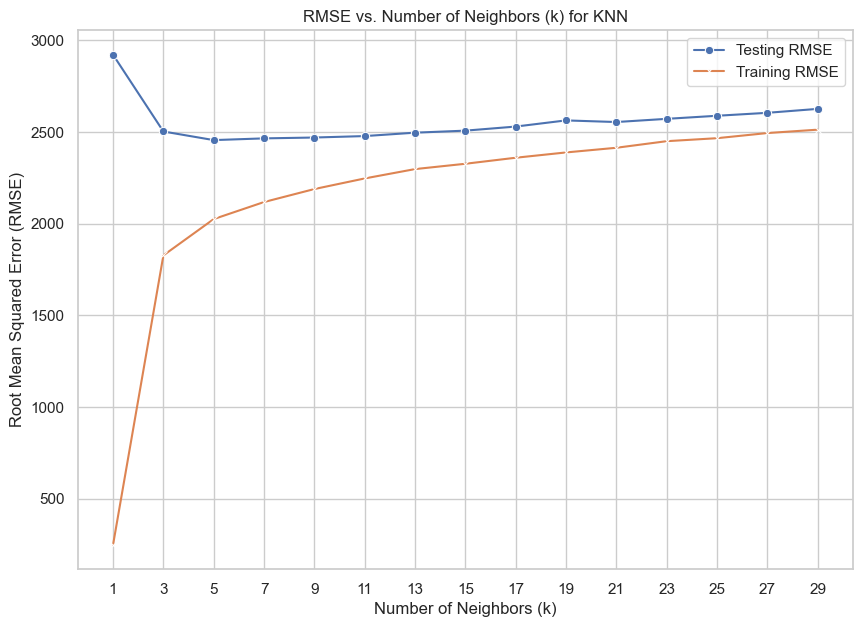

In [257]:
# Create a DataFrame for plotting, using the original k_values
data = pd.DataFrame({'k': k_values, 'Testing RMSE': testing_rmse, 'Training RMSE': training_rmse})

# Create the line plot with a legend
plt.figure(figsize=(10, 7))
sns.lineplot(x='k', y='Testing RMSE', data=data, label='Testing RMSE', marker='o')
sns.lineplot(x='k', y='Training RMSE', data=data, label='Training RMSE', marker='x')

plt.title("RMSE vs. Number of Neighbors (k) for KNN")
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.xticks(k_values)
plt.legend()
plt.show()


In [258]:
mse = mean_squared_error(y_test, y_pred_test_knn)
rmse = np.sqrt(mse)
percentage_errors = (y_test - y_pred_test_knn) / y_test
rmspe = np.sqrt(np.mean(np.square(percentage_errors))) * 100
R2 = r2_score(y_test, y_pred_test_knn)

# Calculate Adjusted R-squared
n = len(y_test)
k = X_test.shape[1]
adjusted_R2 = 1 - ((1 - R2) * (n - 1) / (n - k - 1))

print("\nMetrics Evaluation KNN:")
print('best k:', best_k)
print(f"RMSE: {rmse}")
print(f"RMSPE: {rmspe}")
print(f"Adjusted R2: {adjusted_R2}")


Metrics Evaluation KNN:
best k: 5
RMSE: 2626.0418192514717
RMSPE: 31.836767442385078
Adjusted R2: 0.5951588894592781


**KNN Regression Model Summary**

The analysis indicates that the K-Nearest Neighbors (KNN) model, with a k value of 9, demonstrates moderate performance in predicting CLV. While the Adjusted R-squared value of 0.59 suggests a reasonable level of explanatory power, the RMSPE of 31.84% reveals a significant margin of error. This implies that the model's predictions can deviate considerably from the actual CLV values, potentially limiting its effectiveness for precise decision-making. Additionally, exploring other machine learning algorithms could offer potential solutions for enhancing CLV prediction performance.

**4.5 Finding the best model | Tree Based Model**

In [165]:
# Tree Based Model Benchmark
# Train the data

models = [dtree, rf, gboost, xgboost, lgbr, catboost]
model_name = []
rmse_mean = []
rmse_std = []
rmspe_mean = []
rmspe_std = []

for model in models:

    model_pipeline = Pipeline([
        ("preprocessor", transformer_2),  
        ("modeling", model)
    ])

    kfold = KFold(n_splits=10)

  # RMSE Cross-validation
    rmse_cv = cross_val_score(
        model_pipeline,
        X_train,
        y_train,
        cv=kfold,
        scoring='neg_root_mean_squared_error',
        error_score='raise'
    )

    # RMSPE Cross-validation
    rmspe_cv = cross_val_score(
        model_pipeline,
        X_train,
        y_train,
        cv=kfold,
        scoring=rmspe_scorer,
        error_score='raise'
    )

    # Store results
    model_name.append(model.__class__.__name__)
    rmse_mean.append(abs(rmse_cv.mean()))
    rmse_std.append(rmse_cv.std())
    rmspe_mean.append(abs(rmspe_cv.mean()))
    rmspe_std.append(rmspe_cv.std())

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000393 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 3452, number of used features: 14
[LightGBM] [Info] Start training from score 6873.003859
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010528 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 671
[LightGBM] [Info] Number of data points in the train set: 3452, number of used features: 14
[LightGBM] [Info] Start training from score 6875.584327
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001052 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 672
[LightGBM] [Info] Number of data points in the train se

In [166]:
train_score = pd.DataFrame({
    'model': model_name,
    'rmse_mean': rmse_mean,
    'rmse_std': rmse_std,
    'rmspe_mean': rmspe_mean,
    'rmspe_std': rmspe_std
}).sort_values(by='rmse_mean', ascending=True)
train_score

,model,rmse_mean,rmse_std,rmspe_mean,rmspe_std
2,GradientBoostingRegressor,1793.756478,164.496043,15.483201,0.838624
5,CatBoostRegressor,1856.268590,152.865105,17.288577,1.154663
1,RandomForestRegressor,1865.097932,155.204139,16.167071,0.797815
4,LGBMRegressor,1876.560313,166.561734,16.462565,0.822796
3,XGBRegressor,1956.198016,181.051097,21.971996,2.420784
0,DecisionTreeRegressor,2521.378798,227.235912,23.595573,2.979830


In [167]:
test_predict_rmse = []
test_predict_rmspe = []
model_name = []

for model in models:
    
    model_pipeline = Pipeline([
        ("preprocessor", transformer_2),  
        ("modeling", model)
    ])

    model_pipeline.fit(X_train, y_train)
    y_pred_tb = model_pipeline.predict(X_test)
    
    # Calculate RMSE
    rmse_result = np.sqrt(mean_squared_error(y_test, y_pred_tb))
    test_predict_rmse.append(rmse_result)

    # Calculate RMSPE
    rmspe_result = np.sqrt(np.mean(np.square((y_test - y_pred_tb) / y_test))) * 100
    test_predict_rmspe.append(rmspe_result)

    model_name.append(model.__class__.__name__)

# Create DataFrame for results
benchmark_model_test_tb = pd.DataFrame({
    "model": model_name,
    "rmse_test": test_predict_rmse,
    "rmspe_test": test_predict_rmspe
}).sort_values(by="rmse_test", ascending=True)

benchmark_model_test_tb


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000752 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 675
[LightGBM] [Info] Number of data points in the train set: 3836, number of used features: 14
[LightGBM] [Info] Start training from score 6847.796289
Learning rate set to 0.050633
0:	learn: 3975.8240003	total: 4.38ms	remaining: 4.38s
1:	learn: 3828.8744234	total: 7.9ms	remaining: 3.94s
2:	learn: 3688.8953267	total: 11.6ms	remaining: 3.87s
3:	learn: 3557.4939583	total: 15.2ms	remaining: 3.78s
4:	learn: 3434.3250573	total: 18.6ms	remaining: 3.7s
5:	learn: 3319.0559850	total: 22.1ms	remaining: 3.66s
6:	learn: 3208.6738305	total: 25.9ms	remaining: 3.67s
7:	learn: 3106.4919486	total: 29.6ms	remaining: 3.67s
8:	learn: 3013.6204203	total: 33.3ms	remaining: 3.66s
9:	learn: 2922.8525250	total: 36.9ms	remaining: 3.65s
10:	learn: 2839.5030844	total: 40.3ms	remaining: 3.62s
11:	learn: 2760.4938459	total: 44m

,model,rmse_test,rmspe_test
2,GradientBoostingRegressor,1702.727507,14.179306
5,CatBoostRegressor,1754.950722,15.937109
1,RandomForestRegressor,1779.173800,14.900919
4,LGBMRegressor,1834.637567,15.157346
3,XGBRegressor,1896.010703,20.012504
0,DecisionTreeRegressor,2348.829676,20.832668


In [168]:
benchmark_model = benchmark_model_test_tb.set_index('model').join(train_score.set_index('model'))
if 'std' in benchmark_model.columns:
    benchmark_model.drop('std', axis=1, inplace=True)
benchmark_model['rmse_diff'] = (benchmark_model['rmse_test'] - benchmark_model['rmse_mean']).abs()
benchmark_model['rmspe_diff'] = (benchmark_model['rmspe_test'] - benchmark_model['rmspe_mean']).abs()
benchmark_model = benchmark_model.sort_values(by='rmse_test', ascending=True)
benchmark_model

,rmse_test,rmspe_test,rmse_mean,rmse_std,rmspe_mean,rmspe_std,rmse_diff,rmspe_diff
model,,,,,,,,
GradientBoostingRegressor,1702.727507,14.179306,1793.756478,164.496043,15.483201,0.838624,91.028971,1.303895
CatBoostRegressor,1754.950722,15.937109,1856.268590,152.865105,17.288577,1.154663,101.317868,1.351469
RandomForestRegressor,1779.173800,14.900919,1865.097932,155.204139,16.167071,0.797815,85.924132,1.266152
LGBMRegressor,1834.637567,15.157346,1876.560313,166.561734,16.462565,0.822796,41.922746,1.305219
XGBRegressor,1896.010703,20.012504,1956.198016,181.051097,21.971996,2.420784,60.187313,1.959492
DecisionTreeRegressor,2348.829676,20.832668,2521.378798,227.235912,23.595573,2.979830,172.549122,2.762906


**Tree Based Model Summary**

The benchmark results of tree-based machine learning models reveal that the Gradient Boosting Regressor outperforms other models in predicting Customer Lifetime Value (CLV). It achieves the lowest Root Mean Square Error (RMSE) of 1702, indicating that, on average, its predictions deviate from the actual CLV values by approximately 1702 units. Additionally, the model boasts the lowest Root Mean Square Percentage Error (RMSPE) of 14%, signifying that the average percentage difference between predicted and actual CLV values is 14%. Given its superior performance in minimizing both absolute and relative errors, we will proceed with the Gradient Boosting Regressor for further analysis and refinement in our CLV prediction task.

**4.6 Gradient Boosting Hyperparameter Tuning**

![gradient boosting regression illustration.png](<attachment:gradient boosting regression illustration.png>)

image source --> https://www.researchgate.net/figure/A-schematic-illustration-of-gradient-boosting-regression-39_fig3_374581341

Gradient Boosting Regression (GBR) is a powerful machine learning technique that excels in predicting continuous variables, such as Customer Lifetime Value (CLV). It operates by combining the predictions of multiple weaker models, typically decision trees, to create a stronger overall model.

**How Gradient Boosting Regression Works**:

1. **Initial Prediction**: GBR begins with a simple model, often a single decision tree, that makes an initial prediction for the target variable.
2. **Calculating Residuals**: The differences between the actual values and the initial predictions are called residuals, representing the errors of the initial model.
3. **Building New Trees**: GBR iteratively builds new decision trees, each focusing on predicting the residuals of the previous model. The goal is to minimize these errors with each new tree.
4. **Combining Predictions**: The predictions of each new tree are combined with the previous model's predictions, using a scaling factor called the learning rate, which controls the contribution of each tree.
5. **Iteration**: Steps 2-4 are repeated for a specified number of iterations, with each new tree attempting to correct the errors of the previous models. The learning rate may be adjusted to prevent overfitting as the process progresses.
6. **Final Prediction**: The final prediction is the weighted sum of the predictions from all the trees, resulting in a more accurate and robust model.

**Hyperparameter Tuning with Randomized Search**:

To optimize the performance of GBR, we will utilize Randomized Search for hyperparameter tuning. This involves randomly sampling combinations of hyperparameters from specified distributions and evaluating the model's performance for each combination. The hyperparameters we will tune include:

- `modeling__learning_rate`: Controls the contribution of each tree to the model. Smaller values make the model learn more slowly but can lead to better generalization.
- `modeling__n_estimators`: The number of decision trees to build in the ensemble. More trees can increase accuracy but also risk overfitting.
- `modeling__max_depth`: Determines the maximum depth of each tree, controlling its complexity and potential for overfitting.
- `modeling__min_samples_split`: The minimum number of samples required to split a node in the tree.
- `modeling__min_samples_leaf`: The minimum number of samples required at a leaf node.
- `modeling__subsample`: The fraction of samples used for fitting each tree, introducing randomness and potentially preventing overfitting.
- `modeling__max_features`: The number of features considered when looking for the best split at each node.

By employing Randomized Search, we can efficiently explore the hyperparameter space and identify the optimal combination that minimizes prediction errors and maximizes the model's ability to accurately predict CLV.

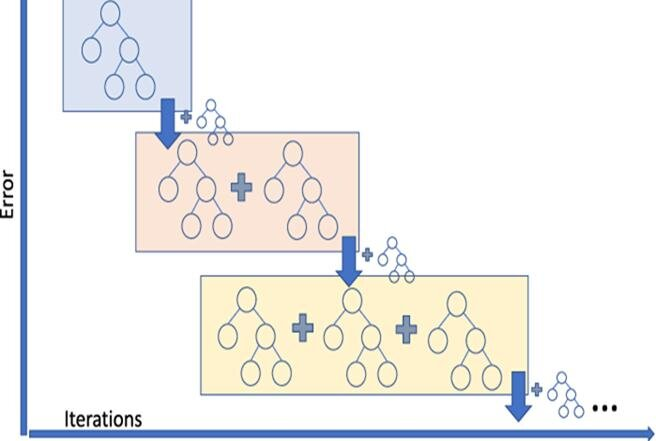

In [56]:
# Gradient Boost with parameter tuning

gboost = GradientBoostingRegressor(random_state=0)
score = []
nilai_mean = []
nilai_std = []

model_pipeline = Pipeline([
    ("preprocess", transformer_2),
    ("modeling", gboost)
])

param_grid = {
    'modeling__learning_rate': [0.01, 0.05, 0.1],
    'modeling__n_estimators': [100, 200, 300],
    'modeling__max_depth': [3, 4, 5, 6],
    'modeling__min_samples_split': [2, 5, 10],
    'modeling__min_samples_leaf': [1, 2, 4],
    'modeling__subsample': [0.8, 0.9, 1.0],
    'modeling__max_features': [None, 'sqrt']
}

kfold = KFold(n_splits=10)

gradient_tuned = RandomizedSearchCV(
    estimator=model_pipeline,
    param_distributions=param_grid,
    scoring='neg_root_mean_squared_error',
    cv=kfold,
    n_iter=15,
    n_jobs=-1,
    verbose=2,
    error_score='raise' 
)

In [57]:
gradient_tuned.fit(X_train, y_train)

In [58]:
# Print the best parameters and best score
print(f"Best parameters: {gradient_tuned.best_params_}")
print(f"Best RMSE: {gradient_tuned.best_score_}")

In [59]:
# # Predicting with best parameters
# y_pred_tuned_gb =gradient_tuned.best_estimator_.predict(X_test)

# mse = mean_squared_error(y_test, y_pred_tuned_gb)
# rmse = np.sqrt(mse)
# percentage_errors = (y_test - y_pred_tuned_gb) / y_test
# rmspe = np.sqrt(np.mean(np.square(percentage_errors))) * 100
# R2 = r2_score(y_test, y_pred_tuned_gb)

# # Calculate Adjusted R-squared
# n = len(y_test)
# k = X_test.shape[1]
# adjusted_R2 = 1 - ((1 - R2) * (n - 1) / (n - k - 1))

# print("\nMetrics Evaluation Gradient Boost After Tuning:")
# print(f"RMSE: {rmse}")
# print(f"RMSPE: {rmspe}")
# print(f"Adjusted R2: {adjusted_R2}")

| Parameter                  | Value   |
|----------------------------|---------|
| modeling__subsample        | 0.9     |
| modeling__n_estimators     | 100     |
| modeling__min_samples_split| 5       |
| modeling__min_samples_leaf | 2       |
| modeling__max_features     | None    |
| modeling__max_depth        | 4       |
| modeling__learning_rate    | 0.05    |


So we continue with the final model Gradient boost with these parameters.

---

**4.7 Final Model**

In [157]:
final_model_gb = GradientBoostingRegressor(random_state=0, subsample= 0.9, n_estimators= 100, min_samples_split= 5, min_samples_leaf= 2, max_features= None, max_depth= 4, learning_rate= 0.05)

gb_pipeline = Pipeline([
    ("preprocess", transformer_2),
    ("modeling", final_model_gb)
])

gb_pipeline.fit(X_train, y_train)
# predict
y_pred_final_gb = gb_pipeline.predict(X_test)

# Calculate metrics for the tuned model
mse = mean_squared_error(y_test, y_pred_final_gb)
rmse_tuned = np.sqrt(mse)
percentage_errors = (y_test - y_pred_final_gb) / y_test
rmspe_tuned = np.sqrt(np.mean(np.square(percentage_errors))) * 100
R2 = r2_score(y_test, y_pred_final_gb)

# Calculate Adjusted R-squared
n = len(y_test)
k = X_test.shape[1]
adjusted_R2_tuned = 1 - ((1 - R2) * (n - 1) / (n - k - 1))

print("\nMetrics Evaluation Gradient Boost with Parameter tuning:")
print(f"RMSE: {rmse_tuned}")
print(f"RMSPE: {rmspe_tuned}")
print(f"Adjusted R2: {adjusted_R2_tuned}")


Metrics Evaluation Gradient Boost with Parameter tuning:
RMSE: 1688.0676895050156
RMSPE: 13.278599227404191
Adjusted R2: 0.832713441613883


| Model                        | RMSE Test Score | RMSPE Test Score |
|------------------------------|-----------------|------------------|
| Gradient Boosting (Baseline) | 1702.727507     | 14.179306        |
| Gradient Boosting (Tuned)    | 1688.067689     | 13.278599        |


**Gradient Boosting Regressor Model Summary**

The Gradient Boosting model with parameter tuning demonstrates a high degree of accuracy in predicting CLV. The RMSE of 1688.07 indicates a relatively small average prediction error in the original units of CLV. More importantly, the RMSPE of 13.28% suggests that the average prediction deviates from the actual CLV by only about 13%, showcasing the model's strong predictive power.  The adjusted R-squared value of 0.832 further supports this conclusion, revealing that the model explains 83.27% of the variance in CLV. Overall, these results highlight the effectiveness of the Gradient Boosting model with parameter tuning in accurately predicting CLV.

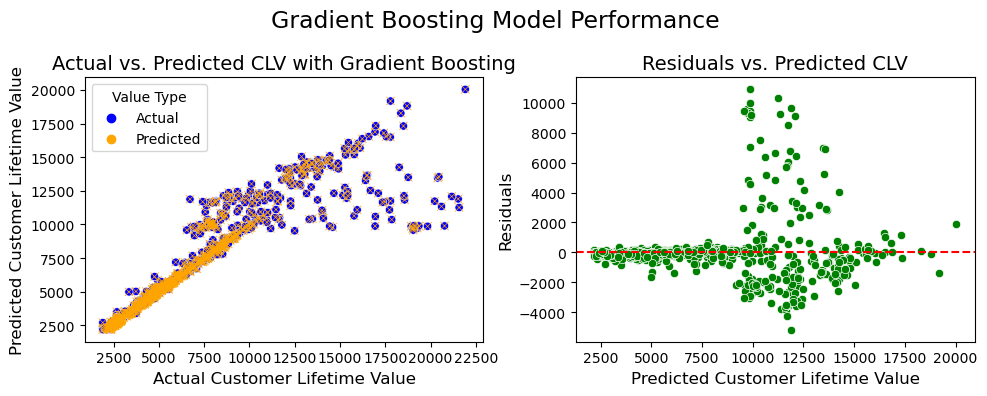

In [61]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Plot 1: Actual vs. Predicted CLV with color distinction
sns.scatterplot(x=y_test, y=y_pred_final_gb, hue=np.repeat(["Actual"], len(y_test)), ax=axs[0], palette=["blue"])  # Actual values are blue
sns.scatterplot(x=y_test, y=y_pred_final_gb, hue=np.repeat(["Predicted"], len(y_pred_final_gb)), ax=axs[0], palette=["orange"], marker="x")  # Predicted are orange 'x'

axs[0].set_xlabel("Actual Customer Lifetime Value", fontsize=12)
axs[0].set_ylabel("Predicted Customer Lifetime Value", fontsize=12)
axs[0].set_title("Actual vs. Predicted CLV with Gradient Boosting", fontsize=14)
axs[0].legend(title="Value Type")

# Plot 2: Residuals vs. Predicted CLV
sns.scatterplot(x=y_pred_final_gb, y=y_test - y_pred_final_gb, ax=axs[1], color="green")  # Residuals are green

axs[1].set_xlabel("Predicted Customer Lifetime Value", fontsize=12)
axs[1].set_ylabel("Residuals", fontsize=12)
axs[1].set_title("Residuals vs. Predicted CLV", fontsize=14)
axs[1].axhline(y=0, color='r', linestyle='dashed')  # Add a horizontal line at y=0

fig.suptitle("Gradient Boosting Model Performance", size=17)
fig.tight_layout()  # Adjust layout for better readability

plt.show()

In [62]:
# creating variable to store the final model
final_model = gb_pipeline

#### **Left Plot (Actual vs. Predicted CLV)**:
The plot above provides a visual representation of the relationship between the actual CLV values and the CLV values predicted by the model.

**Positive Correlation**: The points on the plot generally form a cloud that follows a diagonal line, indicating a positive correlation. This means the model correctly identifies that customers with higher actual CLV tend to have higher predicted CLV as well.

**Clustering Around the Diagonal**: The closer the points are to the diagonal line, the better the model's predictions. The clustering observed in this plot, especially for mid-range CLV values, suggests a good degree of predictive accuracy.

**Spread at Higher Values**: The spread or dispersion of the points around the diagonal line increases as we move towards higher CLV values. This indicates that the model might have slightly more difficulty accurately predicting CLV for customers with value above 10000, the model tends to under-predict the CLV. It could be due to the inherent variability in high-value customers or the model's limitations in capturing the nuances of their behavior.

#### **Right Plot (Residuals vs. Predicted CLV):**

This plot focuses on the residuals, which are the differences between the actual and predicted CLV values. It helps assess the model's prediction errors.

**Ideal Scenario**: In an ideal scenario, the residuals should be randomly scattered around the horizontal line at zero. This would indicate that the model is unbiased, with no systematic over- or under-prediction across different CLV values.

**Heteroscedasticity**: The plot reveals a fanning-out pattern, where the spread of residuals increases as the predicted CLV increases. This is known as heteroscedasticity and implies that the model's predictions become less certain or more variable as the predicted CLV gets higher.

**Outliers**: The presence of a few points with large negative residuals (below the horizontal line) suggests that the model significantly underpredicted the CLV for those specific customers. These outliers warrant further investigation to understand their underlying causes and whether they represent a specific customer segment.

---

The analysis of our Gradient Boosting model reveals promising results for predicting Customer Lifetime Value (CLV), particularly for customers in the low to medium range. This is a crucial finding for our business, as it directly supports our strategic goal of focusing on customer retention.

As we know, acquiring new customers is significantly more expensive than retaining existing ones. By accurately identifying customers with low to medium CLV, we can proactively implement targeted retention strategies. These strategies could involve personalized offers, loyalty programs, or enhanced customer service, all aimed at increasing the lifetime value of these customers and maximizing their long-term profitability.

The model's ability to predict CLV is evident in the positive correlation between actual and predicted values, especially for the mid-range CLV segment. This means we can confidently rely on the model's predictions to identify customers who are at risk of churning or those who have the potential for increased spending.

While the model demonstrates some challenges with higher CLV values and exhibits slight heteroscedasticity, this does not detract from its value for our primary objective of customer retention. The insights gained from the model's predictions will enable us to make informed decisions and allocate resources efficiently to nurture and grow our existing customer base.

In [63]:
df_result = pd.DataFrame({
    "Actual CLV":round(y_test),
    "model prediction":[round(a) for a in y_pred_final_gb]
})
df_result.head(20)

,Actual CLV,model prediction
0,13743.0,13923
1,6006.0,5990
2,3618.0,3563
3,3370.0,3441
4,3424.0,3408
5,9942.0,12175
6,9101.0,9042
7,9114.0,8926
8,2575.0,2669
9,5174.0,5330


**4.9 Feature Importance**

In [64]:
# Getting feature names
features = list(transformer_2.get_feature_names_out())
list_features = []

for feature in features:
    list_features.append("_".join(feature.split("_")[2:]))

list_features

['employmentstatus_Employed',
 'employmentstatus_Medical Leave',
 'employmentstatus_Retired',
 'employmentstatus_Unemployed',
 'marital_status_Married',
 'marital_status_Single',
 'vehicle_class',
 'coverage',
 'renew_offer_type',
 'education',
 'number_of_policies',
 'monthly_premium_auto',
 'total_claim_amount',
 'income']

In [65]:
# assign feature importance
imp = gb_pipeline.named_steps['modeling'].feature_importances_

In [66]:
# to dataframe

feature_imp = pd.DataFrame({
    "Importance":imp,
    "Feature":list_features
}).sort_values(by="Importance", ascending=False)
feature_imp

,Importance,Feature
10,0.684934,number_of_policies
11,0.280775,monthly_premium_auto
12,0.012332,total_claim_amount
13,0.007653,income
6,0.005121,vehicle_class
1,0.003085,employmentstatus_Medical Leave
0,0.001574,employmentstatus_Employed
9,0.001398,education
8,0.000932,renew_offer_type
7,0.000800,coverage


Text(0.5, 1.0, 'Feature importance')

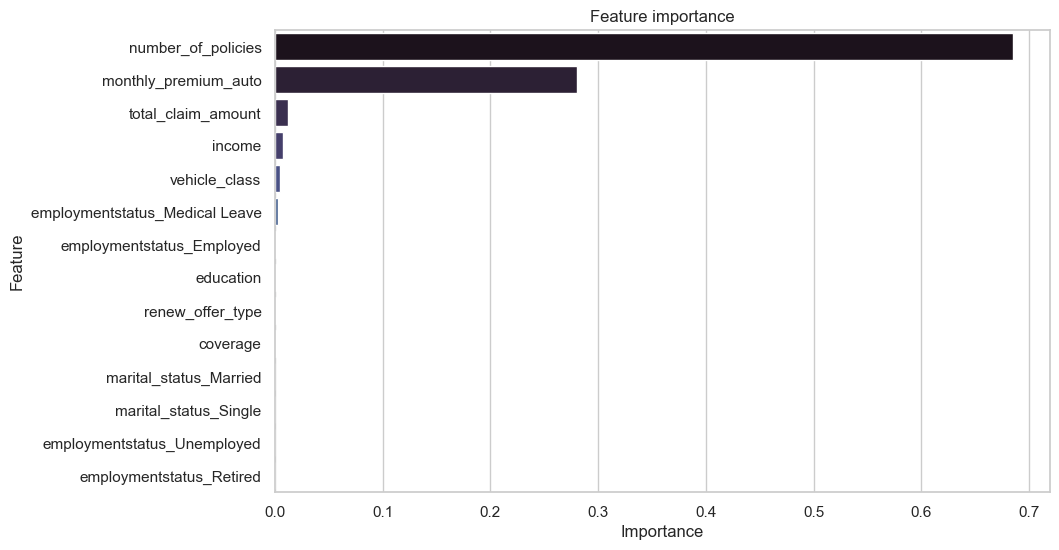

In [67]:
# Feature importance visualization

plt.figure(figsize=(10,6))
sns.set_theme(style="whitegrid")
sns.barplot(data=feature_imp, x="Importance", y="Feature", orient="h", palette="mako")
plt.title("Feature importance")


**4.10 Feature Selection**

In [170]:
X_transformed = transformer_2.transform(X)
X_transformed_df = pd.DataFrame(X_transformed, columns=list_features)

# Assign feature importance
imp = gb_pipeline.named_steps['modeling'].feature_importances_

# Create DataFrame with feature importance
feature_imp = pd.DataFrame({
    "Importance": imp,
    "Feature": list_features
}).sort_values(by="Importance", ascending=False).reset_index(drop=True)

# Set a threshold for feature importance (optional)
threshold = 0.001  # You can adjust this threshold

# Select features above the threshold
selected_features = feature_imp[feature_imp['Importance'] > threshold]['Feature']

# # Or, alternatively, select top N features
# top_n = 10  # Adjust the number of features
# selected_features = feature_imp.head(top_n)['Feature']

# Create a new DataFrame with selected features
X_selected = X_transformed_df[selected_features]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Train the model again
model = GradientBoostingRegressor(random_state=0, subsample= 0.9, n_estimators= 100, min_samples_split= 5, min_samples_leaf= 2, max_features= None, max_depth= 4, learning_rate= 0.05)  # Use your best parameters
model.fit(X_train, y_train)

# Make predictions
y_pred_fs = model.predict(X_test)

# Calculate metrics for the tuned model
mse_fs = mean_squared_error(y_test, y_pred_fs)
rmse_fs = np.sqrt(mse_fs)
percentage_errors = (y_test - y_pred_fs) / y_test
rmspe_fs = np.sqrt(np.mean(np.square(percentage_errors))) * 100
R2 = r2_score(y_test, y_pred_fs)

# Calculate Adjusted R-squared
n = len(y_test)
k = X_test.shape[1]
adjusted_R2_fs = 1 - ((1 - R2) * (n - 1) / (n - k - 1))

print("\nMetrics Evaluation Gradient Boost with Parameter tuning with Feature Selection:")
print(f"RMSE: {rmse_fs}")
print(f"RMSPE: {rmspe_fs}")
print(f"Adjusted R2: {adjusted_R2_fs}")


Metrics Evaluation Gradient Boost with Parameter tuning with Feature Selection:
RMSE: 1848.6605488418663
RMSPE: 14.456694969080608
Adjusted R2: 0.7926958960117371


**Feature Selection Conclusion**

The Gradient Boosting model with parameter tuning and feature selection yielded a worse performance compared to the model without feature selection. While feature selection aimed to improve the model by focusing on the most relevant predictors, the results indicate that it may have removed some valuable information, leading to a decrease in predictive accuracy.

Specifically, the RMSE increased to 1848.66, suggesting a larger average prediction error compared to the model without feature selection. The RMSPE also worsened to 14.46%, indicating a greater percentage deviation of predictions from actual values. Furthermore, the adjusted R-squared decreased to 0.793, implying that the model with feature selection explains a smaller proportion of the variance in the target variable. So we finalized the model with all of the features.

> ### 5. Explainable AI

In [68]:
final_model

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['employmentstatus',
                                                   'marital_status']),
                                                 ('ordinal',
                                                  OrdinalEncoder(categories=[['Two-Door '
                                                                              'Car',
                                                                              'Four-Door '
                                                                              'Car',
                                                                              'SUV',
                                                                              'Sports '
                                                                              'Car',
                                                                              'Luxury '
                                                                              'SUV',
                                                                              'Luxury '
                                                                              'Car'],
                                                                             ['Basic',
                                                                              'Extended',
                                                                              'Premium'],
                                                                             ['Offer1',
                                                                              'Offer2',
                                                                              'Offer3',
                                                                              'Offer4'],
                                                                             ['High '
                                                                              'School '
                                                                              'or '
                                                                              'Below',
                                                                              'College',
                                                                              'Bachelor',
                                                                              'Master',
                                                                              'Doctor']]),
                                                  ['vehicle_class', 'coverage',
                                                   'renew_offer_type',
                                                   'education'])])),
                ('modeling',
                 GradientBoostingRegressor(learning_rate=0.05, max_depth=4,
                                           min_samples_leaf=2,
                                           min_samples_split=5, random_state=0,
                                           subsample=0.9))])

In [70]:
pip install shap

  Obtaining dependency information for shap from https://files.pythonhosted.org/packages/82/29/923869e92c74bf07ec2b9a52ad5ac67d4184c873ba33ada7d4584356463a/shap-0.46.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for slicer==0.0.8 from https://files.pythonhosted.org/packages/63/81/9ef641ff4e12cbcca30e54e72fb0951a2ba195d0cda0ba4100e532d929db/slicer-0.0.8-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/456.1 kB ? eta -:--:--
   ---- ----------------------------------- 51.2/456.1 kB 2.7 MB/s eta 0:00:01
   ---------------- ----------------------- 184.3/456.1 kB 2.2 MB/s eta 0:00:01
   ------------------------------- -------- 358.4/456.1 kB 3.2 MB/s eta 0:00:01
   ---------------------------------------- 456.1/456.1 kB 3.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [72]:
import shap

# explainer

explainer = shap.Explainer(
    final_model[1].predict,
    final_model[0].transform(X_test)
)

shap_values = explainer(final_model[0].transform(X_test))

PermutationExplainer explainer: 961it [01:34,  9.10it/s]                         


----------------------------------------
Customer ID (Index): 3
Test Data: 
vehicle_class           Four-Door Car
coverage                     Extended
renew_offer_type               Offer2
employmentstatus             Employed
marital_status                Married
education                    Bachelor
number_of_policies                1.0
monthly_premium_auto             85.0
total_claim_amount          62.282034
income                        39754.0
Name: 3, dtype: object
Actual CLV: 3369.71211
----------------------------------------


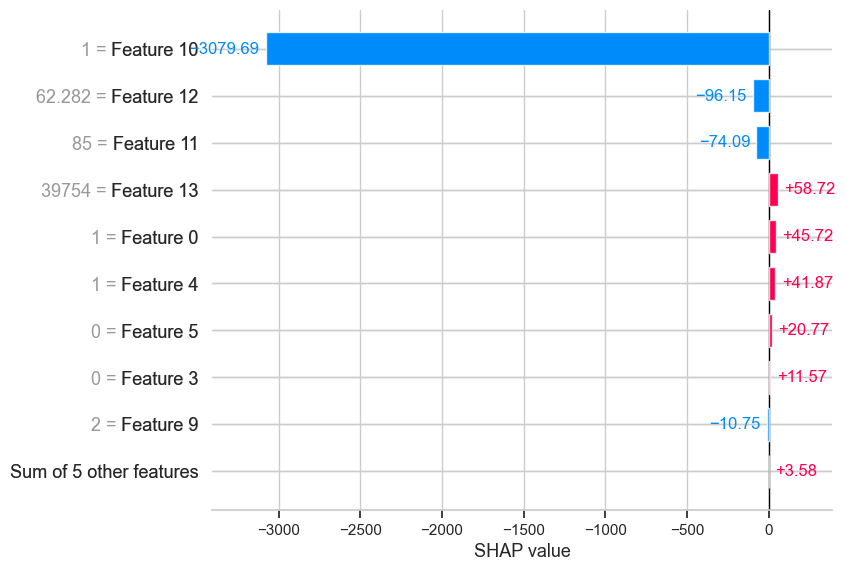

In [73]:
from IPython.display import display

def combined_shap_analysis(i, final_model, X_test, y_test, X_train, list_features):
    """
    Performs and displays SHAP analysis for a given customer ID (index).

    Args:
        i (int): Customer ID (index) to analyze.
        final_model: Fitted pipeline model.
        X_test (DataFrame): Test features.
        y_test (Series): Test target labels.
        X_train (DataFrame): Training features.
        list_features (list): List of feature names.

    Returns:
        None: Displays the analysis outputs.
    """
    
    # 1. Test Data and Prediction
    print("-" * 40)  # Separator for readability
    print(f"Customer ID (Index): {i}")
    print(f"Test Data: \n{X_test.iloc[i]}")
    print(f"Actual CLV: {y_test.iloc[i]}")
    print("-" * 40)  # Separator

    # 2. Bar Plot of SHAP Values (Training Data)
    X_train_trans = final_model[0].transform(X_train)
    X_train_preprocessed = pd.DataFrame(X_train_trans, columns=list_features)
    
    explainer = shap.Explainer(final_model.named_steps["modeling"], X_train_preprocessed)
    # shap_values = explainer(X_train_preprocessed)
    
    # Display bar plot for the specified customer index
    shap.plots.bar(shap_values[i])

    # 3. SHAP Force Plot (Test Data)
    X_test_trans = final_model[0].transform(X_test)
    X_test_preprocessed = pd.DataFrame(X_test_trans, columns=list_features)
    shap.initjs()
    explainer_test = shap.TreeExplainer(final_model.named_steps["modeling"])
    shap_values_test = explainer_test.shap_values(X_test_preprocessed)
    display(shap.force_plot(explainer_test.expected_value, shap_values_test[i], X_test_preprocessed.iloc[i]))

# Get user input for customer ID
i = input("Please enter a customer ID (index): ")  

# Ensure input is a valid index
try:
    i = int(i)
    if i < 0 or i >= len(X_test):
        raise ValueError
except ValueError:
    print("Invalid customer ID (index). Please enter a valid integer within the range of your dataset.")
else:
    # Perform combined analysis
    combined_shap_analysis(i, final_model, X_test, y_test, X_train, list_features)


> ### 6. Conclusion and Recommendation

**6.1 Conclusion**

1. The finalized Gradient Boosting Regressor model with parameter tuning achieved an RMSE of $1688. This means the model's predictions, on average, deviate from the actual customer lifetime value (CLV) by approximately $1688.
2. The model is limited to predicting low to medium customer lifetime values, with some limitations when predicting CLVs above $10,000. The model tends to under-predict CLVs in this range.
3. The model feature with the highest importance is the number of policies (importance score: 0.684934), followed by monthly premium auto (0.280775), total claim amount, income, and vehicle class.
4. Data analysis revealed that customers with two policies have a higher CLV than those with other numbers of policies. This is supported by the OLS summary, showing that having two policies can significantly increase CLV by $8,913. Customers holding only one policy have a lower CLV.
5. Monthly premium auto also significantly increases CLV, as evidenced by the OLS summary.
6. Overall, the model successfully predicts CLV, aligning with the business goal of identifying customers with low to medium CLV for retention and churn prevention. Additionally, the model can help reduce the overall marketing cost of acquiring new customers.

**6.2 Recommendation**


1. **Proactive Customer Retention**:

- Identify At-Risk Customers: Utilize the CLV model to pinpoint customers with lower CLV scores who are at higher risk of churning.
- Targeted Interventions: Develop personalized retention strategies for these customers, such as:
    - Special offers or discounts: Provide incentives to stay with Purwadhika.
    - Enhanced customer service: Offer dedicated support or loyalty programs.
    - Product recommendations: Suggest additional insurance products that meet their needs.

2. **Identifying High-Potential Customers**:

- Focus on Growth: Leverage the model to identify customers with medium to high CLV scores, representing significant long-term value potential.
- Upselling and Cross-Selling: Prioritize these customers for targeted marketing campaigns focused on upselling (higher coverage levels) or cross-selling (additional insurance products).
- Loyalty Programs: Create exclusive programs that reward and retain these high-value customers.

3. **Refining Model Performance**:

- Deeper Customer Behavior Insights: Incorporate additional features into the model that shed light on customer behavior patterns, especially focusing on:
    - Why customers with two policies tend to have higher CLVs.
    - Other factors influencing CLV, such as demographics, driving history, or claims history.
- Enhanced Data Collection: Gather more granular data on customer interactions, preferences, and feedback to further refine the model's accuracy.

4. **Addressing Data Skewness**:

- Log Transformation: Explore applying a log transformation to the CLV variable to address its right-skewed distribution. This can improve model performance, but ensure results are interpreted carefully due to the transformation.


By deploying this refined CLV prediction model, Purwadhika Auto Insurance can transform its customer management approach. It empowers the company to strategically prioritize retention efforts, nurture high-potential customers, and personalize interactions for optimal engagement. This data-driven approach not only reduces churn and boosts profitability but also fosters stronger customer relationships and long-term loyalty. Ultimately, this positions Purwadhika Auto Insurance as a customer-centric leader in the market, with a sustainable competitive advantage driven by deep customer insights and tailored strategies.

> ### 7. Saving the Gradient Boost Model

In [74]:
pickle.dump(final_model, open("model/gb_model_final.pkl", "wb"))